# Leigh Syndrome Project 
Nishaal Ramesh Ajmera   
Supervisors: Dr Stephen McGough, Dr Amy Vincent, Dr Conor Lawless, Atif Khan

# Load the data

In [1]:
# Import the data
# some sheet names vary across the three datasets therefore change the sheet_names list according to the dataset
import os
import pandas as pd
import numpy as np

path =r"/Users/nishaalajmera/Documents/MScProject/Data/"

sheet_names = ["All patient data - 2021-02-11T0","Genotype","Histochemistry","All Heteroplasmy",
               "Basic Clinical Data","Phenotype","Systemic features","Family History","Social History",
               "Blood Results","Neurophysiology","Imaging","Cardiac","Opthalmology","Audiology",
               "Transplant","NMDAS","Paediatric Information","NPMDS","Mortality"]

dataframes_ncl = [pd.read_excel(os.path.join(path,"Leighs_patients_at_Newcastle_and_outreach centres_after_Albert_review.xlsx"),sheet_name=f) for f in sheet_names]


sheet_names = ["All patient data - 2021-02-11T1","Genotype","Histochemistry","All heteroplasmy",
               "Basic clinical data","Phenotype","Systemic features","Family History","Social History",
               "Blood results","Neurophysiology","Imaging","Cardiac","Opthalmology","Audiology",
               "Transplant","NMDAS","Paediatric Information","NPMDS","Mortality"]

dataframes_ucl = [pd.read_excel(os.path.join(path,"Leighs_patients_at_UCL_after_Albert_review.xlsx"),sheet_name=f) for f in sheet_names]

sheet_names = ["All patient data - 2021-02-11T1","Genotype","Histochemistry","All Heteroplasmy",
               "Basic clinical data","Phenotype","Systemic features","Family History","Social history",
               "Blood Results","Neurophysiology","Imaging","Cardiac","Opthalmology","Audiology",
               "Transplant","NMDAS","Paediatric Information","NPMDS","Mortality"]

dataframes_oxf = [pd.read_excel(os.path.join(path,"Leighs_patients_at_Oxford_after_Albert_review.xlsx"),sheet_name=f) for f in sheet_names]

# Seperate the dataframes into individual dataframes for each sheet 
all_ncl,gen_ncl,his_ncl,heter_ncl,clin_ncl,phen_ncl,sys_ncl,fam_ncl,soc_ncl,blood_ncl,neuro_ncl,img_ncl,car_ncl,opth_ncl,aud_ncl,trans_ncl,nmdas_ncl,paed_ncl,npmds_ncl,mort_ncl = dataframes_ncl[:]

all_ucl,gen_ucl,his_ucl,heter_ucl,clin_ucl,phen_ucl,sys_ucl,fam_ucl,soc_ucl,blood_ucl,neuro_ucl,img_ucl,car_ucl,opth_ucl,aud_ucl,trans_ucl,nmdas_ucl,paed_ucl,npmds_ucl,mort_ucl = dataframes_ucl[:]

all_oxf,gen_oxf,his_oxf,heter_oxf,clin_oxf,phen_oxf,sys_oxf,fam_oxf,soc_oxf,blood_oxf,neuro_oxf,img_oxf,car_oxf,opth_oxf,aud_oxf,trans_oxf,nmdas_oxf,paed_oxf,npmds_oxf,mort_oxf = dataframes_oxf[:]


In [2]:
# Concatenate same sheet types into one dataframe per sheet 
all =  pd.concat([all_ncl,all_ucl,all_oxf],ignore_index=True)
gen =  pd.concat([gen_ncl,gen_ucl,gen_oxf],ignore_index=True)
his =  pd.concat([his_ncl,his_ucl,his_oxf],ignore_index=True)
heter = pd.concat([heter_ncl,heter_ucl,heter_oxf],ignore_index=True)
clin = pd.concat([clin_ncl,clin_ucl,clin_oxf],ignore_index=True)
phen = pd.concat([phen_ncl,phen_ucl,phen_oxf],ignore_index=True)
sys = pd.concat([sys_ncl,sys_ucl,sys_oxf],ignore_index=True)
fam = pd.concat([fam_ncl,fam_ucl,fam_oxf],ignore_index=True)
soc = pd.concat([soc_ncl,soc_ucl,soc_oxf],ignore_index=True)
blood = pd.concat([blood_ncl,blood_ucl,blood_oxf],ignore_index=True)
neuro = pd.concat([neuro_ncl,neuro_ucl,neuro_oxf],ignore_index=True)
img = pd.concat([img_ncl,img_ucl,img_oxf],ignore_index=True)
car = pd.concat([car_ncl,car_ucl,car_oxf],ignore_index=True)
opth = pd.concat([opth_ncl,opth_ucl,opth_oxf],ignore_index=True)
aud = pd.concat([aud_ncl,aud_ucl,aud_oxf],ignore_index=True)
trans = pd.concat([trans_ncl,trans_ucl,trans_oxf],ignore_index=True)
nmdas = pd.concat([nmdas_ncl,nmdas_ucl,nmdas_oxf],ignore_index=True)
paed = pd.concat([paed_ncl,paed_ucl,paed_oxf],ignore_index=True)
npmds = pd.concat([npmds_ncl,npmds_ucl,npmds_oxf],ignore_index=True)
mort = pd.concat([mort_ncl,mort_ucl,mort_oxf],ignore_index=True)

# Cycle 1 - Data Cleaning 

In [3]:
# the date columns for sheets that are not converted to datetime format are converted 

df_date = [his,heter,clin,phen,sys,paed]

for df in df_date:
    df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
    
#pd.set_option('display.max_rows', 250)
# To check percentage of missing values in each column 
# opth.isnull().sum()/ opth.shape[0]




### Handling Missingness - 60% Threshold
Columns which have missingness of 60% and above in each dataframe are removed. Histochemistry, NPMDS and NMDAS dataframes are not capped at 60% threshold at this stage. 

In [4]:
# Remove columns with more than 60% missingness
# his,npmds,nmdas not included

df_NA = [gen,heter,clin,phen,sys,fam,soc,blood,neuro,img,car,opth,aud,paed,mort]

for df in df_NA:
    limitPer = len(df) * .40
    df.dropna(axis=1,thresh=limitPer,inplace=True)

# Remove other column that contains notes from Genetics data 
gen.drop(columns = ["Other notes"],inplace=True)

# Remove Age from Heterogenous column as it can be calculated from columns 
heter.drop(columns = ["Age"],inplace=True)

# Remove three columns in Histochemistry sheet that have more than 60% missingness
his.drop(columns = ["Histochemistry","COX deficient fibers (%)","RRF (%)"],inplace=True)


# Remove uninformative column from Neurophysiology data 
neuro.drop(columns = ["EEG Report"],inplace=True)

# Remove Date columns for time-independent features
paed.drop(columns = ["Date"],inplace=True)

fam.drop(columns = ["Date"],inplace=True)

# Drop columns with all NA in mortality dataset
mort.dropna(axis=1, how='all',inplace=True)

### Renaming Features 
Renaming features for consistency and reproducibility 

In [5]:
#Rename the features
all.columns = ['UniqueID', 'Birth_date', 'Sex', 'Institution', 'Death_date']

gen.columns = ['UniqueID', 'Genetics']

his.columns = ['UniqueID','Date','His_Normal','ComplexI','ComplexII','ComplexIII','ComplexIV','ComplexV']

heter.columns = ['UniqueID', 'Date', 'Heter_Blood']

clin.columns = ['UniqueID', 'Date', 'Weight_kg', 'FVC_predicted']

phen.columns = ['UniqueID', 'Date', 'Deafness', 'Hypotonia', 'Developmental_delay']

sys.columns = ['UniqueID','Date','Autoimmune','Endocrine','Gastrointestinal',
               'Liver','Reproductive','Respiratory','Hypertension',
               'Hypercholesterolaemia', 'Anaemia', 'Spinal_bone_disease']

fam.columns = ['UniqueID','Parental_consanguinity', 'Inheritance_Pattern']

soc.columns = ['UniqueID', 'Date', 'Smoking', 'Alcohol_consumption']

blood.columns = ['UniqueID', 'Date', 'Hemoglobin', 'Sodium',
                 'Potassium','Urea','Creatinine','Alanine_aminotransferase',
                 'Bilirubin','Alkaline_Phosphatase','Adjusted_calcium']

neuro.columns = ['UniqueID', 'Date', 'Slow_wave', 'Sharp_wave']

img.columns = ['UniqueID', 'Date', 'Other.1', 'Other.2']

car.columns = ['UniqueID', 'Date', 'ECG_Normal', 'ECHO_Normal']

opth.columns = ['UniqueID', 'Date', 'Opth_Normal']

aud.columns = ['UniqueID','Date','Aud_Normal','Sensorineural_loss_right','Sensorineural_loss_left']
trans.columns = ['UniqueID','Date','Transplant','Kidney','Liver','Heart',
                 'Lung','Pancreas','Bone_Marrow']

paed.columns = ['UniqueID', 'Consanguinity','Presentation_age','Diagnosis_age',
                'Diagnosis_basis','Reduced_movement','Abnormalities','Gestational_age',
                'Delivery_method','Birth_weight_g','Resuscitation']

mort.columns = ['UniqueID','Age_at_death','Cause_of_Death_Ia']


### Data Cleaning for some specific features 

In [6]:
# Remove rows that have NA for Date columns in each dataset
df_date = [his,heter,clin,phen,sys,blood,neuro,car,opth,aud]

for df in df_date:
    df.dropna( how='any',subset=['Date'],inplace=True)
    
# Replace non-numerical value for numerical columns
blood['Bilirubin'] = blood['Bilirubin'].replace(['<3'],0)

aud['Aud_Normal'] = aud['Aud_Normal'].replace([True],1)
aud['Sensorineural_loss_right'] = aud['Sensorineural_loss_right'].replace(['NORMAL'],0)
aud['Sensorineural_loss_left'] = aud['Sensorineural_loss_left'].replace(['NORMAL'],0)
aud['Sensorineural_loss_right'] = aud['Sensorineural_loss_right'].replace([True],1)
aud['Sensorineural_loss_left'] = aud['Sensorineural_loss_left'].replace([True],1)

#Replace the sex of patient ee9e
all.loc[all.UniqueID == 'ee9e', 'Sex'] = 'F' 

    

### Feature Imputation 1
By Deduction - this step is performed before joining the data so that deduction for missing values is only performed on dates where these specific clinical outcomes are measured. 

In [7]:
# Deduce the missing Normal values to be 0 as it has abnormalities in other related columns 

his[['His_Normal','ComplexI','ComplexII','ComplexIII','ComplexIV','ComplexV']] = his[['His_Normal','ComplexI','ComplexII','ComplexIII','ComplexIV','ComplexV']].fillna(0)
car[['ECG_Normal','ECHO_Normal']] = car[['ECG_Normal','ECHO_Normal']].fillna(0) 
opth[['Opth_Normal']] = opth[['Opth_Normal']].fillna(0) 
aud[['Aud_Normal','Sensorineural_loss_right','Sensorineural_loss_left']] = aud[['Aud_Normal','Sensorineural_loss_right','Sensorineural_loss_left']].fillna(0) 

## Joining data 

In [8]:
# Combine the dataframes with temporal clinical outcomes
temporal = pd.merge(his, heter, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, clin, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, phen, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, sys, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, blood, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, neuro, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, car, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, opth, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, aud, on=["UniqueID", "Date"],how='outer')

# Combine the dataframes for time-independent patient characteristics
char = pd.merge(all, gen, on=["UniqueID"],how='left')
char = pd.merge(char, paed, on=["UniqueID"],how='left')
char = pd.merge(char, fam, on=["UniqueID"],how='left')

# Merge both dataframes together
df_combined =  pd.merge(char,temporal, on=["UniqueID"],how='left')

In [9]:
# Group the feature types 
categorical = ['UniqueID','Sex','Institution','Genetics','Consanguinity',
               'Diagnosis_basis','Reduced_movement','Abnormalities',
               'Delivery_method','Resuscitation','Parental_consanguinity',
               'Inheritance_Pattern','His_Normal','ComplexI','ComplexII','ComplexIII',
               'ComplexIV','ComplexV','Deafness','Hypotonia','Developmental_delay',
               'Autoimmune','Endocrine','Gastrointestinal','Liver','Reproductive',
               'Respiratory','Hypertension','Hypercholesterolaemia','Anaemia',
               'Spinal_bone_disease','Slow_wave','Sharp_wave','ECG_Normal','ECHO_Normal',
               'Opth_Normal','Aud_Normal','Sensorineural_loss_right','Sensorineural_loss_left']

numerical = ['Presentation_age','Diagnosis_age','Gestational_age','Birth_weight_g',
             'Heter_Blood','Weight_kg','FVC_predicted','Hemoglobin','Sodium','Potassium','Urea',
             'Creatinine','Alanine_aminotransferase','Bilirubin','Alkaline_Phosphatase','Adjusted_calcium']

timeseries = ['Birth_date','Death_date','Date']

## Data Analysis 

In [10]:
df_combined.shape

(354, 58)

### Descriptive Statistics 

In [11]:
df_combined[numerical].describe()

,Presentation_age,Diagnosis_age,Gestational_age,Heter_Blood,Weight_kg,FVC_predicted,Hemoglobin,Sodium,Potassium,Urea,Creatinine,Alanine_aminotransferase,Bilirubin,Alkaline_Phosphatase,Adjusted_calcium
count,147.000000,146.000000,216.000000,9.000000,122.000000,134.000000,34.000000,42.000000,41.000000,39.000000,37.000000,32.000000,35.000000,31.000000,25.00000
mean,1.527483,2.191781,39.319444,0.882222,20.978648,1.279080,84.688235,139.380952,4.431707,4.251282,25.810811,28.562500,5.228571,146.903226,2.43480
std,2.175722,1.599806,1.707655,0.099471,10.529962,1.234505,54.514817,2.836628,0.424523,1.957425,14.009596,51.515696,3.532086,45.142260,0.08766
min,0.000000,0.000000,32.000000,0.710000,6.795000,-1.417600,11.100000,128.000000,3.500000,0.800000,9.000000,10.000000,0.000000,89.000000,2.14000
25%,1.000000,2.000000,39.000000,0.800000,14.162500,0.379050,13.175000,139.000000,4.200000,2.400000,18.000000,14.000000,3.000000,119.000000,2.41000
50%,1.000000,2.000000,40.000000,0.950000,18.700000,1.084300,112.500000,140.000000,4.400000,4.400000,22.000000,17.000000,4.000000,135.000000,2.44000
75%,1.000000,2.000000,40.000000,0.960000,25.150000,2.259200,128.500000,141.000000,4.700000,5.650000,28.000000,20.250000,6.500000,159.500000,2.48000
max,10.000000,9.000000,42.000000,0.970000,71.000000,3.690000,155.000000,144.000000,5.400000,7.400000,68.000000,306.000000,19.000000,276.000000,2.56000


In [12]:
import warnings
warnings.filterwarnings('ignore')

df_combined[timeseries].describe()

,Birth_date,Death_date,Date
count,354,30,352
unique,57,9,305
top,2008-07-08 00:00:00,2013-08-25 00:00:00,2019-11-25 00:00:00
freq,87,10,4
first,1982-12-22 00:00:00,2012-01-23 00:00:00,1900-01-01 00:00:00
last,2018-04-10 00:00:00,2020-11-06 00:00:00,2021-02-08 00:00:00


In [13]:
print("Total number of patients in study:",df_combined['UniqueID'].nunique())
print("No. patient in Histochemistry sheet:",his['UniqueID'].nunique())
print("No. patient in Heteroplasmy sheet:",heter['UniqueID'].nunique())
print("No. patient in Clinical data sheet:",clin['UniqueID'].nunique())
print("No. patient in Phenotype sheet:",phen['UniqueID'].nunique())
print("No. patient in Systemic features sheet:",sys['UniqueID'].nunique())
print("No. patient in Family sheet:",fam['UniqueID'].nunique())
print("No. patient in Blood Results sheet:",blood['UniqueID'].nunique())
print("No. patient in Neurophysiology sheet:",neuro['UniqueID'].nunique())
print("No. patient in Imaging sheet:",img['UniqueID'].nunique())
print("No. patient in Cardiac sheet:",car['UniqueID'].nunique())
print("No. patient in Opthalmology sheet:",opth['UniqueID'].nunique())
print("No. patient in Audiology sheet:",aud['UniqueID'].nunique())
print("No. patient in Paediatric info sheet:",paed['UniqueID'].nunique())

Total number of patients in study: 57
No. patient in Histochemistry sheet: 19
No. patient in Heteroplasmy sheet: 11
No. patient in Clinical data sheet: 39
No. patient in Phenotype sheet: 54
No. patient in Systemic features sheet: 14
No. patient in Family sheet: 17
No. patient in Blood Results sheet: 15
No. patient in Neurophysiology sheet: 11
No. patient in Imaging sheet: 28
No. patient in Cardiac sheet: 26
No. patient in Opthalmology sheet: 16
No. patient in Audiology sheet: 13
No. patient in Paediatric info sheet: 31


### Feature Imputation 2
Single Imputation and Last Observation Carried Forward

In [14]:
# Imputation for Histochemistry features
df_combined.His_Normal=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).His_Normal.fillna(method="ffill")
df_combined.ComplexI=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).ComplexI.fillna(method="ffill")
df_combined.ComplexII=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).ComplexII.fillna(method="ffill")
df_combined.ComplexIII=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).ComplexIII.fillna(method="ffill")
df_combined.ComplexIV=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).ComplexIV.fillna(method="ffill")
df_combined.ComplexV=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).ComplexV.fillna(method="ffill")

# Imputation for Heteroplasmy features
df_combined['Heter_Blood'] = df_combined['Heter_Blood'].fillna((df_combined['Heter_Blood'].mean()))

# Imputation for Clinical measurements 
df_combined.Weight_kg=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Weight_kg.apply(lambda x : x.ffill().bfill())
df_combined['FVC_predicted'] = df_combined['FVC_predicted'].fillna(clin.groupby('UniqueID')['FVC_predicted'].transform('median'))

# Imputation for Phenotype features
df_combined.Deafness=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Deafness.fillna(method="ffill")
df_combined.Hypotonia=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Hypotonia.fillna(method="ffill")
df_combined.Developmental_delay=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Developmental_delay.fillna(method="ffill")

# Imputation for Clinical measurements 
df_combined.Weight_kg=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Weight_kg.apply(lambda x : x.ffill().bfill())
df_combined['FVC_predicted'] = df_combined['FVC_predicted'].fillna(clin.groupby('UniqueID')['FVC_predicted'].transform('median'))

# Imputation for Blood features
df_combined['Hemoglobin']= df_combined['Hemoglobin'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Hemoglobin'].transform('mean'))
df_combined['Sodium']= df_combined['Sodium'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Sodium'].transform('mean'))
df_combined['Potassium']= df_combined['Potassium'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Potassium'].transform('mean'))
df_combined['Urea']= df_combined['Urea'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Urea'].transform('mean'))
df_combined['Creatinine']= df_combined['Creatinine'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Creatinine'].transform('mean'))
df_combined['Alanine_aminotransferase']= df_combined['Alanine_aminotransferase'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Alanine_aminotransferase'].transform('mean'))
df_combined['Bilirubin']= df_combined['Bilirubin'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Bilirubin'].transform('mean'))
df_combined['Alkaline_Phosphatase']= df_combined['Alkaline_Phosphatase'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Alkaline_Phosphatase'].transform('mean'))
df_combined['Adjusted_calcium']= df_combined['Adjusted_calcium'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Adjusted_calcium'].transform('mean'))

# Imputation for Neurophysiological features
df_combined.Slow_wave=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Slow_wave.fillna(method="ffill")
df_combined.Sharp_wave=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Sharp_wave.fillna(method="ffill")

# Imputation for Cardiac features
df_combined.ECG_Normal=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).ECG_Normal.fillna(method="ffill")
df_combined.ECHO_Normal=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).ECHO_Normal.fillna(method="ffill")

# Imputation for Opthalmology features
df_combined.Opth_Normal=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Opth_Normal.fillna(method="ffill")

# Imputation for Audiology features
df_combined.Aud_Normal=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Aud_Normal.fillna(method="ffill")
df_combined.Sensorineural_loss_right=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Sensorineural_loss_right.fillna(method="ffill")
df_combined.Sensorineural_loss_left=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Sensorineural_loss_left.fillna(method="ffill")

After, imputation of missing values within Unique ID groups, there are still many features that have high missingness. Therefore, features with less than 60% missingness are selected for the combined dataset and further imputation will be carried out. 

In [15]:
# Select columns with less than 60% missingness 
cols = ['UniqueID','Birth_date','Death_date','Date',
        'Institution','Sex',
        'Diagnosis_age','Presentation_age','Gestational_age',
        'Heter_Blood','Birth_weight_g','Weight_kg','FVC_predicted',
        'Genetics','Consanguinity','Diagnosis_basis','Delivery_method',
        'Deafness','Hypotonia','Developmental_delay','Resuscitation',
        'Sharp_wave','ECG_Normal','ECHO_Normal',
        'His_Normal','ComplexI','ComplexII','ComplexIII','ComplexIV','ComplexV']

df_condensed = df_combined[cols]

### Visualizations

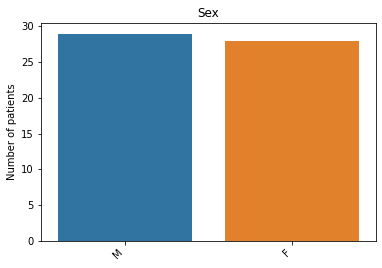

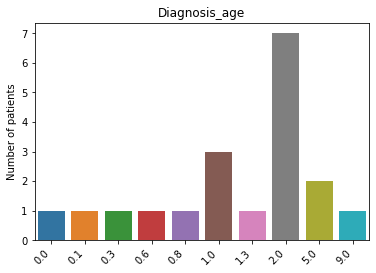

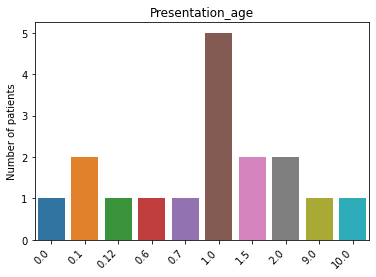

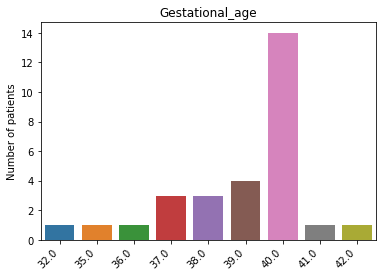

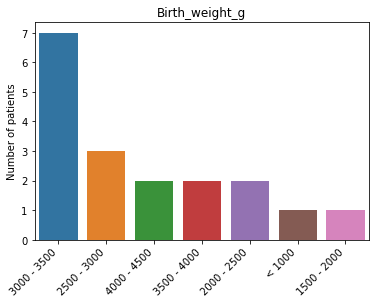

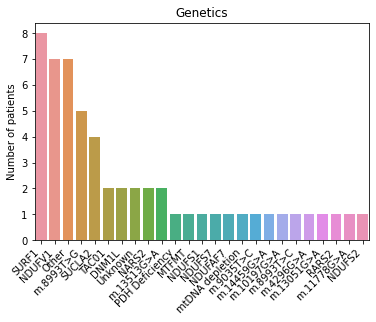

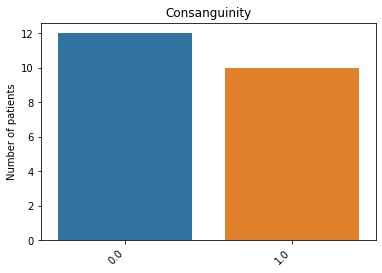

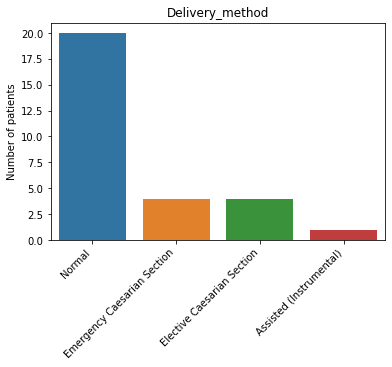

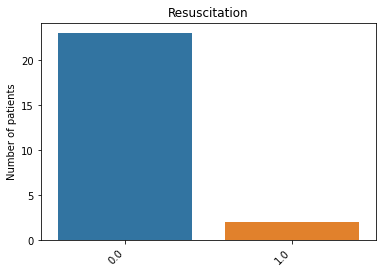

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

freq = df_condensed[['UniqueID','Sex','Diagnosis_age','Presentation_age',
                     'Gestational_age','Birth_weight_g','Genetics',
                     'Consanguinity','Delivery_method','Resuscitation']].drop_duplicates()

freq.drop(columns=['UniqueID'],inplace=True)

#for i in freq.columns:
#    fig_dims = (8, 6)
#    ax = plt.subplots(figsize=fig_dims)
#    sns.barplot(freq[i].value_counts().index, freq[i].value_counts()).set_title(i)
#    plt.show()


for i in freq.columns:
    plt.figure(figsize=(6,4))
    chart = sns.barplot(freq[i].value_counts().index, freq[i].value_counts()).set_title(i)
    plt.ylabel("Number of patients")
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',  
    )
    None #dont show any label objects

In [17]:
#pd.set_option('display.max_rows', 250)
# To check percentage of missing values in each column 
#df_combined.isnull().sum().sort_values(ascending = False)/ df_combined.shape[0]

### Informative imputation 

In [18]:
# Impute remaining missing values with 9 
cols = ['Diagnosis_age','Presentation_age','Gestational_age',
        'Heter_Blood','Birth_weight_g','Weight_kg','FVC_predicted',
        'Genetics','Consanguinity','Diagnosis_basis','Delivery_method',
        'Deafness','Hypotonia','Developmental_delay','Resuscitation',
        'Sharp_wave','ECG_Normal','ECHO_Normal',
        'His_Normal','ComplexI','ComplexII','ComplexIII','ComplexIV','ComplexV']

for i in cols:
    df_condensed[i]=df_condensed[i].fillna(9)


In [19]:
df_condensed.shape


(354, 30)

## Cycle 1 - Data Preparation 

In [20]:
# Preparing data for survival analysis 
surv_df = df_condensed

# Removing records with dates prior to birth date
surv_df = surv_df[surv_df["Date"] > surv_df["Birth_date"]] 

# Keeping last date seen 
surv_df = surv_df.sort_values(by="Date").drop_duplicates(subset=["UniqueID"], keep="last")

# Calculating patient age at date of visit/record
surv_df['Age'] = surv_df.apply(lambda x: x['Death_date']-x['Birth_date'] \
                               if(pd.notnull(x['Death_date'])) \
                               else x['Date']- x['Birth_date'], axis = 1)
#Converting Age to Years
surv_df['Age'] = surv_df['Age'].astype('timedelta64[D]').astype(int)
surv_df['Age'] = surv_df['Age']/365

# Recording Event - Death or Right Censored
surv_df['Event'] =  surv_df.apply(lambda x: 0 \
                               if(pd.isnull(x['Death_date'])) \
                               else 1, axis = 1)
# Dropping unecessary columns 
surv_df.drop(columns=['Birth_date','Death_date','Date','Institution','Diagnosis_basis','UniqueID'],inplace=True)

### Feature Engineering 

In [21]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
surv_df['Sex'] = labelencoder.fit_transform(surv_df['Sex'])

surv_df['Birth_weight_g']=surv_df['Birth_weight_g'].replace({'< 1000':0,'1500 - 2000':1,
                                                             '2000 - 2500':2,'2500 - 3000':3,'3000 - 3500':4,
                                                             '3500 - 4000':5,'4000 - 4500':6})
surv_df['Genetics']=surv_df['Genetics'].replace({'Unknown':9,'Other':9})

surv_df = pd.get_dummies(surv_df,columns=['Genetics'],drop_first=True,prefix='G')
surv_df = pd.get_dummies(surv_df,columns=['Delivery_method'],drop_first=True,prefix='Del')

In [22]:
pd.set_option('display.max_columns', 250)
surv_df.head(5)

,Sex,Diagnosis_age,Presentation_age,Gestational_age,Heter_Blood,Birth_weight_g,Weight_kg,FVC_predicted,Consanguinity,Deafness,Hypotonia,Developmental_delay,Resuscitation,Sharp_wave,ECG_Normal,ECHO_Normal,His_Normal,ComplexI,ComplexII,ComplexIII,ComplexIV,ComplexV,Age,Event,G_DNM1L,G_MTFMT,G_NARS2,G_NDUFAF7,G_NDUFS1,G_NDUFS2,G_NDUFS7,G_NDUFV1,G_PDH Deficiency,G_RARS2,G_SUCLA2,G_SURF1,G_TAC01,G_m.10197G>A,G_m.11778G>A,G_m.13051G>A,G_m.13513G>A,G_m.14459G>A,G_m.4296G>A,G_m.8993T>C,G_m.8993T>G,G_m.9035T>C,G_mtDNA depletion,Del_Assisted (Instrumental),Del_Elective Caesarian Section,Del_Emergency Caesarian Section,Del_Normal
0,0,9.0,9.0,9.0,0.882222,9,23.0,9.0000,9.0,0.0,9.0,9.0,9.0,0.0,0.0,0.0,9.0,9.0,9.0,9.0,9.0,9.0,3.504110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
107,0,9.0,9.0,9.0,0.882222,9,9.0,3.6254,9.0,0.0,9.0,9.0,9.0,9.0,9.0,9.0,0.0,1.0,0.0,0.0,1.0,0.0,17.290411,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
319,1,9.0,9.0,9.0,0.882222,9,9.0,9.0000,9.0,9.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,2.819178,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
318,0,9.0,9.0,9.0,0.882222,9,17.3,9.0000,9.0,9.0,1.0,1.0,9.0,9.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,7.753425,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92,1,9.0,9.0,9.0,0.882222,9,9.0,9.0000,9.0,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,2.419178,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
surv_df.shape

(55, 51)

### Splitting Data 
Split data at 80% into train and test dataset 

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(surv_df,test_size=0.2, random_state=0)

X_train = df_train.drop(columns = ['Event','Age'])
y_train = df_train[['Event','Age']]
X_test = df_test.drop(columns = ['Event','Age'])
y_test = df_test[['Event','Age']]

### Kaplan Meier Estimator 

<AxesSubplot:title={'center':'Survival plot of Leigh patients'}, xlabel='Age (years)', ylabel='Probability of survival'>

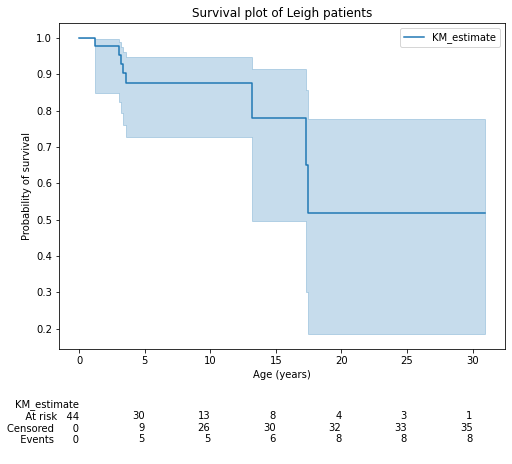

In [25]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(y_train['Age'], event_observed=y_train['Event'])

from matplotlib import pyplot as plt
from lifelines.plotting import add_at_risk_counts

plt.figure(figsize=(8,6))
kmf.plot_survival_function()
plt.title("Survival plot of Leigh patients");
plt.ylabel("Probability of survival")
plt.xlabel("Age (years)")

add_at_risk_counts(kmf)

In [26]:
kmf.median_survival_time_


inf

## Survival Analysis 1.1 : Cox Proportional Hazards

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sklearn.model_selection import GridSearchCV, KFold


In [28]:
# Formatting y dataframe into tuple array 
y_train['Event'] = y_train['Event'].replace([1],True)
y_train['Event'] = y_train['Event'].replace([0],False)
y_train = y_train.to_records(index=False)


In [29]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

cph = CoxPHSurvivalAnalysis(alpha=0.1)
cph.fit(X_train, y_train)


CoxPHSurvivalAnalysis(alpha=0.1)

In [30]:
coef= cph.coef_
coefficients = pd.DataFrame(coef,columns=['coefficient'],index=X_train.columns)


Number of non-zero coefficients: 46


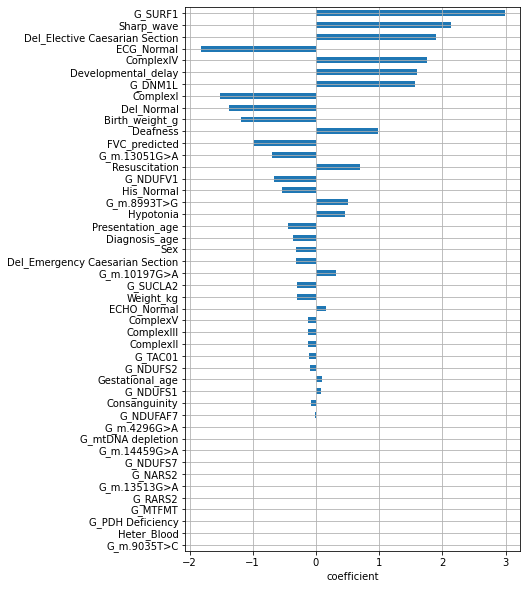

In [31]:
non_zero = np.sum(coefficients.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

non_zero_coefs = coefficients.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 10))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

In [32]:
from sksurv.metrics import concordance_index_censored

y_test['Event'] = y_test['Event'].replace([1],True)
y_test['Event'] = y_test['Event'].replace([0],False)
y_test = y_test.to_records(index=False)

prediction = cph.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0] )


concordance index: 0.3333333333333333


In [33]:
from sksurv.metrics import brier_score

survs = cph.predict_survival_function(X_test)
preds = [fn(4) for fn in survs]
score = brier_score(y_train,y_test, preds,4)

print("4 year Brier score:",score[1])

4 year Brier score: [0.09307382]


In [34]:
survs = cph.predict_survival_function(X_test)
preds = [fn(10) for fn in survs]
score = brier_score(y_train,y_test, preds,10)

print("10 year Brier score:",score[1])

10 year Brier score: [0.09307494]


In [35]:
survs = cph.predict_survival_function(X_test)
preds = [fn(17) for fn in survs]
score = brier_score(y_train,y_test, preds,24)

print("24 year Brier score:",score[1])

24 year Brier score: [0.09311351]


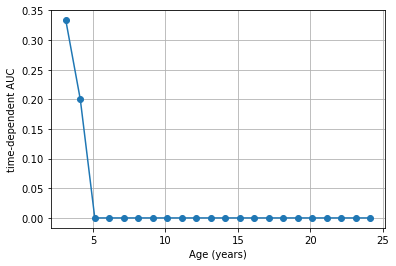

In [42]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(2.1232876712328768, 24.304109589041097)

cph_auc, cph_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, cph_auc, marker="o")
plt.axhline(cph_mean_auc, linestyle="--")
plt.xlabel("Age (years)")
plt.ylabel("time-dependent AUC")
plt.grid(True)

## Survival Analysis 1.2 : Coxnet
Cox-proportional Hazards with Elastic Net and 5-fold Cross Validation

In [36]:

from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis


from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import make_pipeline



In [37]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

coxnet_pipe = make_pipeline(
    StandardScaler(),
    CoxnetSurvivalAnalysis()
)
warnings.simplefilter("ignore", ConvergenceWarning)
coxnet_pipe.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis', CoxnetSurvivalAnalysis())])

In [38]:
# Hyperparameter tuning and 5-fold Cross Validation
estimated_alphas = coxnet_pipe.named_steps["coxnetsurvivalanalysis"].alphas_
cv = KFold(n_splits=5, shuffle=True, random_state=0)
gcv = GridSearchCV(
    make_pipeline(StandardScaler(), CoxnetSurvivalAnalysis(fit_baseline_model=True)),
    param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas]},
    cv=cv,
    error_score=0.5,
    n_jobs=4).fit(X_train, y_train)

cv_results = pd.DataFrame(gcv.cv_results_)


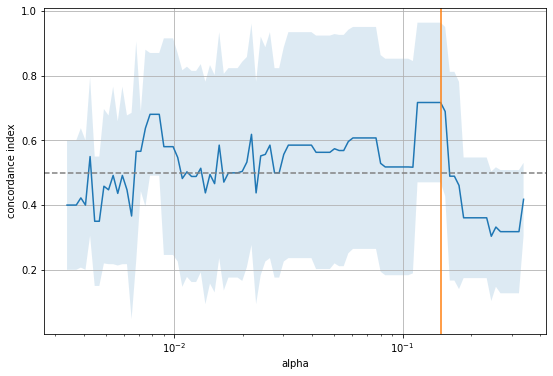

In [39]:
alphas = cv_results.param_coxnetsurvivalanalysis__alphas.map(lambda x: x[0])
mean = cv_results.mean_test_score
std = cv_results.std_test_score

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(alphas, mean)
ax.fill_between(alphas, mean - std, mean + std, alpha=.15)
ax.set_xscale("log")
ax.set_ylabel("concordance index")
ax.set_xlabel("alpha")
ax.axvline(gcv.best_params_["coxnetsurvivalanalysis__alphas"][0], c="C1")
ax.axhline(0.5, color="grey", linestyle="--")
ax.grid(True)

Number of non-zero coefficients: 8


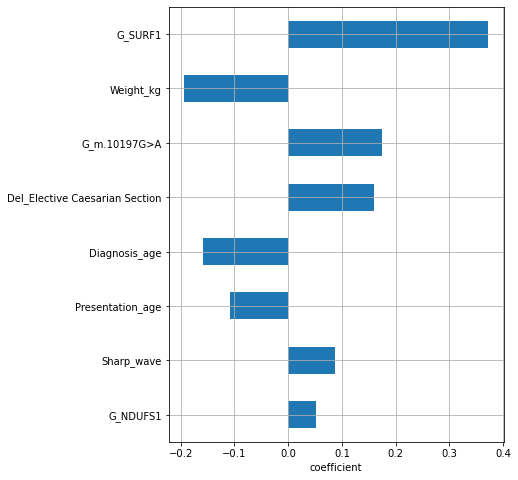

In [40]:
best_model = gcv.best_estimator_.named_steps["coxnetsurvivalanalysis"]
best_coefs = pd.DataFrame(
    best_model.coef_,
    index=X_train.columns,
    columns=["coefficient"]
)

non_zero = np.sum(best_coefs.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

non_zero_coefs = best_coefs.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

In [41]:
non_zero_coefs.sort_values(by='coefficient',ascending=False)

,coefficient
G_SURF1,0.372345
G_m.10197G>A,0.174818
Del_Elective Caesarian Section,0.160208
Sharp_wave,0.086273
G_NDUFS1,0.052727
Presentation_age,-0.107946
Diagnosis_age,-0.159086
Weight_kg,-0.193894


In [42]:
prediction =  gcv.best_estimator_.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0])

concordance index: 0.8888888888888888


In [43]:
survs = gcv.best_estimator_.predict_survival_function(X_test)
preds = [fn(4) for fn in survs]
score = brier_score(y_train,y_test, preds,4)

print("4 year Brier score:",score[1])

4 year Brier score: [0.05055068]


In [44]:
survs = gcv.best_estimator_.predict_survival_function(X_test)
preds = [fn(10) for fn in survs]
score = brier_score(y_train,y_test, preds,10)

print("10 year Brier score:",score[1])

10 year Brier score: [0.0531906]


In [45]:
survs = gcv.best_estimator_.predict_survival_function(X_test)
preds = [fn(17) for fn in survs]
score = brier_score(y_train,y_test, preds,17)

print("17 year Brier score:",score[1])

17 year Brier score: [0.03627163]


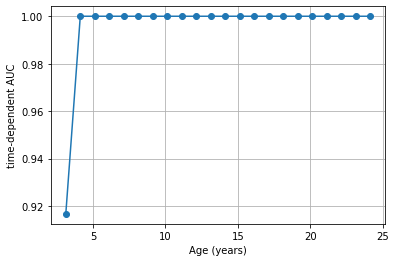

In [56]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(2.1232876712328768, 24.304109589041097)

cph_auc, cph_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, cph_auc, marker="o")
plt.axhline(cph_mean_auc, linestyle="--")
plt.xlabel("Age (years)")
plt.ylabel("time-dependent AUC")
plt.grid(True)

## Survival Analysis 1.3 : AFT with inverse probability of censoring weights

In [57]:
from sksurv.linear_model import IPCRidge

ipc = IPCRidge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto')
ipc.fit(X_train, y_train)

IPCRidge()

In [58]:
coef= ipc.coef_
coefficients = pd.DataFrame(coef,columns=['coefficient'],index=X_train.columns)

Number of non-zero coefficients: 28


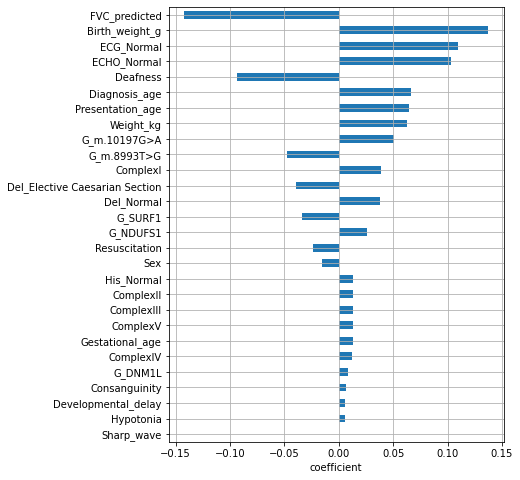

In [59]:
non_zero = np.sum(coefficients.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

non_zero_coefs = coefficients.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

In [60]:
non_zero_coefs.sort_values(by='coefficient',ascending=False)

,coefficient
Birth_weight_g,1.374270e-01
ECG_Normal,1.096633e-01
ECHO_Normal,1.034332e-01
Diagnosis_age,6.661219e-02
Presentation_age,6.487127e-02
Weight_kg,6.257550e-02
G_m.10197G>A,5.097855e-02
ComplexI,3.918918e-02
Del_Normal,3.750275e-02
G_NDUFS1,2.593420e-02


In [61]:
prediction = ipc.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0])

concordance index: 0.8888888888888888


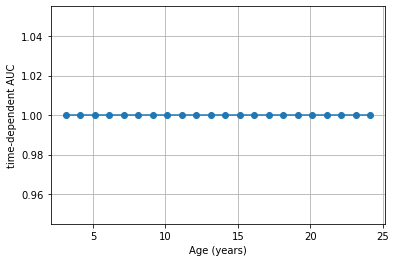

In [62]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(2.1232876712328768, 24.304109589041097)

ipc_auc, ipc_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, ipc_auc, marker="o")
plt.axhline(ipc_mean_auc, linestyle="--")
plt.xlabel("Age (years)")
plt.ylabel("time-dependent AUC")
plt.grid(True)

## Survival Analysis 1.4 : Componentwise Gradient Boosting 

In [46]:
from sksurv.ensemble import ComponentwiseGradientBoostingSurvivalAnalysis
cgb = ComponentwiseGradientBoostingSurvivalAnalysis(loss='coxph', learning_rate=0.1, n_estimators=100, subsample=1.0, dropout_rate=0, random_state=None, verbose=0)
cgb.fit(X_train, y_train)

ComponentwiseGradientBoostingSurvivalAnalysis()

In [47]:
coef= cgb.coef_
coefficients = pd.DataFrame(coef[1:],columns=['coefficient'],index=X_train.columns)


Number of non-zero coefficients: 5


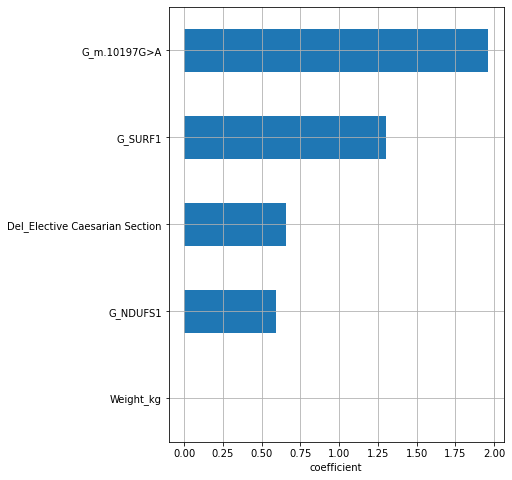

In [48]:
non_zero = np.sum(coefficients.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

non_zero_coefs = coefficients.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

In [49]:
non_zero_coefs.sort_values(by='coefficient',ascending=False)

,coefficient
G_m.10197G>A,1.961738
G_SURF1,1.303982
Del_Elective Caesarian Section,0.654928
G_NDUFS1,0.594283
Weight_kg,-0.001921


In [50]:
prediction = cgb.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0])

concordance index: 0.8888888888888888


In [51]:
survs = cgb.predict_survival_function(X_test)
preds = [fn(4) for fn in survs]
score = brier_score(y_train,y_test, preds,4)

print("4 year Brier score:",score[1])

4 year Brier score: [0.05063628]


In [52]:
survs = cgb.predict_survival_function(X_test)
preds = [fn(10) for fn in survs]
score = brier_score(y_train,y_test, preds,10)

print("10 year Brier score:",score[1])

10 year Brier score: [0.05253607]


In [53]:
survs = cgb.predict_survival_function(X_test)
preds = [fn(17) for fn in survs]
score = brier_score(y_train,y_test, preds,17)

print("17 year Brier score:",score[1])

17 year Brier score: [0.0372631]


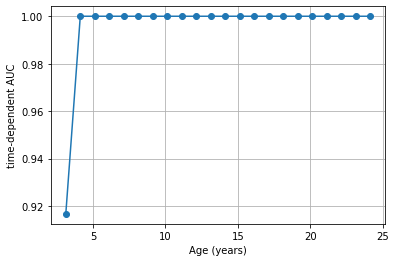

In [56]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(2.1232876712328768, 24.304109589041097)

cgb_auc, cgb_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, cgb_auc, marker="o")
plt.axhline(cgb_mean_auc, linestyle="--")
plt.xlabel("Age (years)")
plt.ylabel("time-dependent AUC")
plt.grid(True)

## Survival Analysis 1.5 : Random Survival Forest

In [71]:
from sksurv.ensemble import RandomSurvivalForest


rsf = RandomSurvivalForest(n_estimators=50,
                           min_samples_split=8,
                           min_samples_leaf=4,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=0,
                           verbose=1)

rsf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


RandomSurvivalForest(max_features='sqrt', min_samples_leaf=4,
                     min_samples_split=8, n_estimators=50, n_jobs=-1,
                     random_state=0, verbose=1)

In [72]:
prediction = rsf.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0])

concordance index: 0.7777777777777778


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [73]:
survs = rsf.predict_survival_function(X_test)
preds = [fn(4) for fn in survs]
score = brier_score(y_train,y_test, preds,4)

print("4 year Brier score:",score[1])

4 year Brier score: [0.07006187]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [74]:
survs = rsf.predict_survival_function(X_test)
preds = [fn(10) for fn in survs]
score = brier_score(y_train,y_test, preds,10)

print("10 year Brier score:",score[1])

10 year Brier score: [0.07481901]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [76]:
survs = rsf.predict_survival_function(X_test)
preds = [fn(17) for fn in survs]
score = brier_score(y_train,y_test, preds,17)

print("17 year Brier score:",score[1])

17 year Brier score: [0.06888436]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


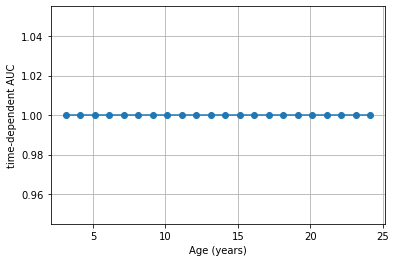

In [77]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(2.1232876712328768, 24.304109589041097)

rsf_auc, rsf_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, rsf_auc, marker="o")
plt.axhline(rsf_mean_auc, linestyle="--")
plt.xlabel("Age (years)")
plt.ylabel("time-dependent AUC")
plt.grid(True)

In [61]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(rsf, n_iter=15, random_state=0)
perm.fit(X_test, y_test)
feature_names = X_test.columns.tolist()
eli5.show_weights(perm, feature_names=feature_names)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Paral

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job

Weight,Feature
0.3000 ± 0.3823,Deafness
0.1556 ± 0.3014,Weight_kg
0.0741 ± 0.1048,G_SURF1
0.0519 ± 0.1374,Developmental_delay
0.0370 ± 0.1932,Presentation_age
0.0296 ± 0.0983,Sex
0.0222 ± 0.0889,Consanguinity
0.0074 ± 0.0554,FVC_predicted
0 ± 0.0000,ComplexV
0 ± 0.0000,ComplexIV


## Cycle 2 - Data Cleaning 

### Handling Missingness - 40% threshold 
Columns which have missingness of 40% and above in each dataframe are removed.

In [54]:
# Same sheet types are concatenated into one dataframe per sheet 
all =  pd.concat([all_ncl,all_ucl,all_oxf],ignore_index=True)
gen =  pd.concat([gen_ncl,gen_ucl,gen_oxf],ignore_index=True)
his =  pd.concat([his_ncl,his_ucl,his_oxf],ignore_index=True)
heter = pd.concat([heter_ncl,heter_ucl,heter_oxf],ignore_index=True)
clin = pd.concat([clin_ncl,clin_ucl,clin_oxf],ignore_index=True)
phen = pd.concat([phen_ncl,phen_ucl,phen_oxf],ignore_index=True)
sys = pd.concat([sys_ncl,sys_ucl,sys_oxf],ignore_index=True)
fam = pd.concat([fam_ncl,fam_ucl,fam_oxf],ignore_index=True)
soc = pd.concat([soc_ncl,soc_ucl,soc_oxf],ignore_index=True)
blood = pd.concat([blood_ncl,blood_ucl,blood_oxf],ignore_index=True)
neuro = pd.concat([neuro_ncl,neuro_ucl,neuro_oxf],ignore_index=True)
img = pd.concat([img_ncl,img_ucl,img_oxf],ignore_index=True)
car = pd.concat([car_ncl,car_ucl,car_oxf],ignore_index=True)
opth = pd.concat([opth_ncl,opth_ucl,opth_oxf],ignore_index=True)
aud = pd.concat([aud_ncl,aud_ucl,aud_oxf],ignore_index=True)
trans = pd.concat([trans_ncl,trans_ucl,trans_oxf],ignore_index=True)
nmdas = pd.concat([nmdas_ncl,nmdas_ucl,nmdas_oxf],ignore_index=True)
paed = pd.concat([paed_ncl,paed_ucl,paed_oxf],ignore_index=True)
npmds = pd.concat([npmds_ncl,npmds_ucl,npmds_oxf],ignore_index=True)
mort = pd.concat([mort_ncl,mort_ucl,mort_oxf],ignore_index=True)

Applying column specific removals before removing columns with missingness threshold 

In [55]:
# Convert Date columns for sheets that are not converted to datetime format 

df_date = [his,heter,clin,phen,sys,paed]

for df in df_date:
    df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

# Remove rows that have NA for Date columns in each dataset
df_date = [his,heter,clin,phen,sys,blood,neuro,car,opth,aud]

for df in df_date:
    df.dropna( how='any',subset=['Date'],inplace=True)

# Other column that contains notes from Genetics data is removed
gen.drop(columns = ["Other notes"],inplace=True)

# Age from Heterogenous column is removed as it can be calculated from columns 
heter.drop(columns = ["Age"],inplace=True)

# Three columns in Histochemistry sheet that have more than 60% missingness are removed
his.drop(columns = ["Histochemistry","COX deficient fibers (%)","RRF (%)"],inplace=True)

# Drop redundant Sex column in clin dataframe
clin.drop(columns = ["Sex"],inplace=True)


# Uninformative column from Neurophysiology data is removed
neuro.drop(columns = ["EEG Report"],inplace=True)

# Date columns for time-independent features are removed
paed.drop(columns = ["Date"],inplace=True)

fam.drop(columns = ["Date"],inplace=True)

# dropping columns with all NA in mortality dataset
mort.dropna(axis=1, how='all',inplace=True)



In [56]:
# Replace column names 
all.rename(columns = {'Unique ID':'UniqueID','Birth date':'Birth_date', 'Death date':'Death_date'},inplace=True)

gen.rename(columns = {'Unique ID':'UniqueID'},inplace=True)

his.rename(columns = {'Unique ID':'UniqueID','Normal':'His_Normal','Complex I':'ComplexI','Complex II':'ComplexII','Complex III':'ComplexIII','Complex IV':'ComplexIV','Complex V':'ComplexV'},inplace=True)

heter.rename(columns = {'Unique ID':'UniqueID'},inplace=True)

clin.rename(columns = {'Unique ID':'UniqueID'},inplace=True)

phen.rename(columns = {'Unique ID':'UniqueID'},inplace=True)

sys.rename(columns = {'Unique ID':'UniqueID'} ,inplace=True)

blood.rename(columns = {'Unique ID':'UniqueID','Hemoglobin (Hb) (g/L)':'Hemoglobin', 'Sodium (Na)':'Sodium',
                 'Potassium (K)':'Potassium','Alanine aminotransferase (ALT)':'Alanine_aminotransferase'}, inplace=True)

neuro.rename(columns = {'Unique ID':'UniqueID'} ,inplace=True)

car.rename(columns = {'Unique ID':'UniqueID','Normal':'ECG_Normal', 'Normal.1':'ECHO_Normal'}, inplace=True)

opth.rename(columns = {'Unique ID':'UniqueID','Normal':'Opth_Normal'}, inplace=True)

aud.rename(columns = {'Unique ID':'UniqueID'}, inplace=True)

paed.rename(columns = {'Unique ID':'UniqueID', 'Diagnosis age':'Diagnosis_age',
                'Diagnosis_basis':'Diagnosis_basis','Gestational age':'Gestational_age',
                'Delivery method':'Delivery_method'}, inplace=True)

mort.rename(columns = {'Unique ID':'UniqueID','Age at death':'Age_at_death','Cause of Death Ia)':'Cause_of_Death_Ia'},inplace=True)

fam.rename(columns = {'Unique ID':'UniqueID'}, inplace=True)

# Replace non-numerical value for numerical columns
blood['Bilirubin'] = blood['Bilirubin'].replace(['<3'],0)

# Replace the sex of patient ee9e
all.loc[all.UniqueID == 'ee9e', 'Sex'] = 'F' 

In [57]:
# Impute values by Deduction
his[['His_Normal','ComplexI','ComplexII','ComplexIII','ComplexIV','ComplexV']] = his[['His_Normal','ComplexI','ComplexII','ComplexIII','ComplexIV','ComplexV']].fillna(0)
car[['ECG_Normal','ECHO_Normal']] = car[['ECG_Normal','ECHO_Normal']].fillna(0) 
opth[['Opth_Normal']] = opth[['Opth_Normal']].fillna(0) 


In [58]:
# Combining dataframes with temporal clinical outcomes
temporal = pd.merge(his, heter, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, clin, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, phen, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, sys, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, blood, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, neuro, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, car, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, opth, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, aud, on=["UniqueID", "Date"],how='outer')

# Combining dataframes for time-independent patient characteristics
char = pd.merge(all, gen, on=["UniqueID"],how='left')
char = pd.merge(char, paed, on=["UniqueID"],how='left')
char = pd.merge(char, fam, on=["UniqueID"],how='left')

# Merging both datasets together
df_combined =  pd.merge(char,temporal, on=["UniqueID"],how='left')

In [59]:
df_combined.shape

(354, 322)

In [60]:
limitPer = len(df_combined) * .60
df_combined.dropna(axis=1,thresh=limitPer,inplace=True)
df_combined.drop(columns=['Gestational_age','Delivery_method'],inplace=True)

In [61]:
df_condensed = df_combined
# Informative imputation
df_condensed['Genetics']=df_condensed['Genetics'].fillna(9)
df_condensed = pd.merge(df_condensed, all[['UniqueID','Death_date']], on=["UniqueID"],how='left')

## Cycle 2 -  Data Preparation 

In [62]:
# Preparing data for survival analysis 
surv_df = df_condensed

# Removing records with dates prior to birth date
surv_df = surv_df[surv_df["Date"] > surv_df["Birth_date"]] 

# Keeping last date seen 
surv_df = surv_df.sort_values(by="Date").drop_duplicates(subset=["UniqueID"], keep="last")

# Calculating patient age at date of visit/record
surv_df['Age'] = surv_df.apply(lambda x: x['Death_date']-x['Birth_date'] \
                               if(pd.notnull(x['Death_date'])) \
                               else x['Date']- x['Birth_date'], axis = 1)
# Converting Age to Years
surv_df['Age'] = surv_df['Age'].astype('timedelta64[D]').astype(int)
surv_df['Age'] = surv_df['Age']/365

# Recording Event - Death or Right Censored
surv_df['Event'] =  surv_df.apply(lambda x: 0 \
                               if(pd.isnull(x['Death_date'])) \
                               else 1, axis = 1)
# Dropping unecessary columns 
surv_df.drop(columns=['Birth_date','Death_date','Date','UniqueID','Institution'],inplace=True)


# Feature Engineering
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
surv_df['Sex'] = labelencoder.fit_transform(surv_df['Sex'])

surv_df['Genetics']=surv_df['Genetics'].replace({'Unknown':9,'Other':9})

surv_df = pd.get_dummies(surv_df,columns=['Genetics'],drop_first=True,prefix='G')

In [63]:
surv_df.shape

(55, 26)

In [64]:
pd.set_option('display.max_columns', 250)
surv_df.head(5)

,Sex,Age,Event,G_DNM1L,G_MTFMT,G_NARS2,G_NDUFAF7,G_NDUFS1,G_NDUFS2,G_NDUFS7,G_NDUFV1,G_PDH Deficiency,G_RARS2,G_SUCLA2,G_SURF1,G_TAC01,G_m.10197G>A,G_m.11778G>A,G_m.13051G>A,G_m.13513G>A,G_m.14459G>A,G_m.4296G>A,G_m.8993T>C,G_m.8993T>G,G_m.9035T>C,G_mtDNA depletion
0,0,3.504110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
107,0,17.290411,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
319,1,2.819178,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
318,0,7.753425,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92,1,2.419178,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [65]:
import numpy as np
from sklearn.model_selection import train_test_split

random_state = 0

df_train, df_test = train_test_split(surv_df,test_size=0.2, random_state=random_state)

X_train = df_train.drop(columns = ['Event','Age'])
y_train = df_train[['Event','Age']]
X_test = df_test.drop(columns = ['Event','Age'])
y_test = df_test[['Event','Age']]


## Survival Model 2.1 - Kaplan Meier Fitter 

In [66]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(y_train['Age'], event_observed=y_train['Event'])


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 44 total observations, 36 right-censored observations>

<AxesSubplot:title={'center':'Survival plot of Leigh patients'}, xlabel='Age (years)', ylabel='Probability of survival'>

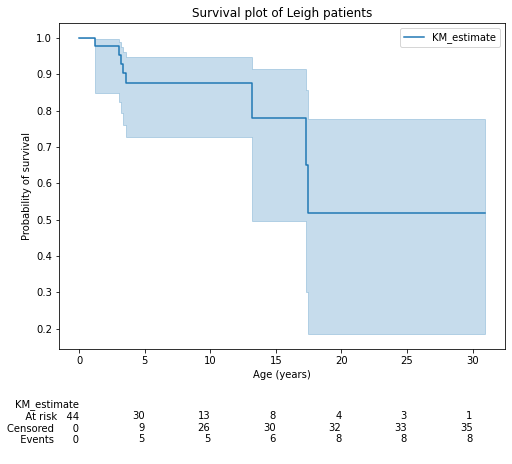

In [67]:
from matplotlib import pyplot as plt
from lifelines.plotting import add_at_risk_counts

plt.figure(figsize=(8,6))
kmf.plot_survival_function()
plt.title("Survival plot of Leigh patients");
plt.ylabel("Probability of survival")
plt.xlabel("Age (years)")

add_at_risk_counts(kmf)


## Survival Analysis 2.2 :- Cox Proportional Hazard

In [68]:
# Formatting y dataframe into tuple array 
y_train['Event'] = y_train['Event'].replace([1],True)
y_train['Event'] = y_train['Event'].replace([0],False)
y_train = y_train.to_records(index=False)


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sklearn.model_selection import GridSearchCV, KFold

cph = CoxPHSurvivalAnalysis(alpha=0.1)
cph.fit(X_train, y_train)

CoxPHSurvivalAnalysis(alpha=0.1)

In [70]:
coef= cph.coef_
coefficients = pd.DataFrame(coef,columns=['coefficient'],index=X_train.columns)
coefficients.sort_values(by='coefficient',ascending=False)

,coefficient
G_m.10197G>A,2.143449
G_SURF1,2.124209
G_NDUFS1,2.086378
Sex,1.248364
G_m.8993T>G,0.820356
G_DNM1L,0.402867
G_m.8993T>C,0.000000
G_m.11778G>A,0.000000
G_m.13051G>A,-0.158568
G_NDUFAF7,-0.277795


Number of non-zero coefficients: 22


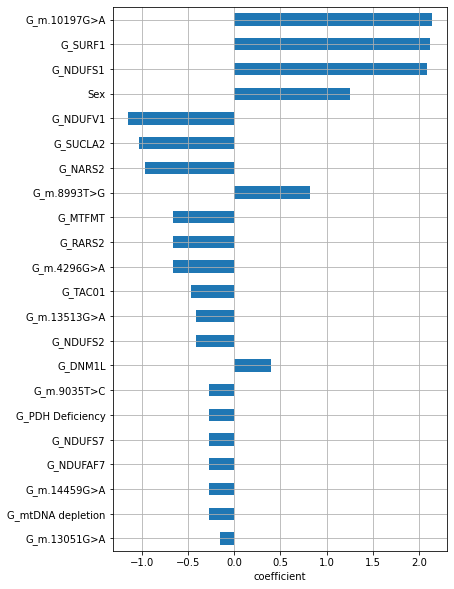

In [71]:
non_zero = np.sum(coefficients.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

non_zero_coefs = coefficients.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 10))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

In [72]:
from sksurv.metrics import concordance_index_censored

y_test['Event'] = y_test['Event'].replace([1],True)
y_test['Event'] = y_test['Event'].replace([0],False)
y_test = y_test.to_records(index=False)

prediction = cph.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print ('concordance index:', result[0])

concordance index: 0.9444444444444444


In [73]:
survs = cph.predict_survival_function(X_test)
preds = [fn(4) for fn in survs]
score = brier_score(y_train,y_test, preds,4)

print("4 year Brier score:",score[1])

4 year Brier score: [0.02008691]


In [74]:
survs = cph.predict_survival_function(X_test)
preds = [fn(10) for fn in survs]
score = brier_score(y_train,y_test, preds,10)

print("10 year Brier score:",score[1])

10 year Brier score: [0.01523705]


In [75]:
survs = cph.predict_survival_function(X_test)
preds = [fn(17) for fn in survs]
score = brier_score(y_train,y_test, preds,17)

print("17 year Brier score:",score[1])

17 year Brier score: [0.01967283]


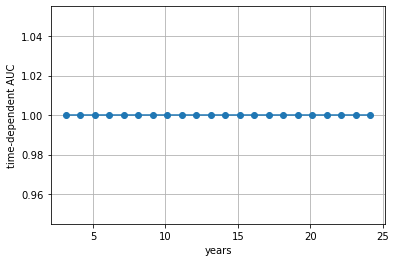

In [98]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(2.1232876712328768, 24.304109589041097)

cph_auc, cph_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, cph_auc, marker="o")
plt.axhline(cph_mean_auc, linestyle="--")
plt.xlabel("years")
plt.ylabel("time-dependent AUC")
plt.grid(True)

## Survival Analysis 2.3 :- Cox Net
Cox-proportional hazards with Elastic Net and 5-fold Cross validation

In [76]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

coxnet_pipe = make_pipeline(
    StandardScaler(),
    CoxnetSurvivalAnalysis()
)
warnings.simplefilter("ignore", ConvergenceWarning)
coxnet_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis', CoxnetSurvivalAnalysis())])

In [77]:
estimated_alphas = coxnet_pipe.named_steps["coxnetsurvivalanalysis"].alphas_
cv = KFold(n_splits=5, shuffle=True, random_state=random_state)
gcv = GridSearchCV(
    make_pipeline(StandardScaler(), CoxnetSurvivalAnalysis(fit_baseline_model=True)),
    param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas]},
    cv=cv,
    error_score=0.5,
    n_jobs=4).fit(X_train, y_train)

cv_results = pd.DataFrame(gcv.cv_results_)


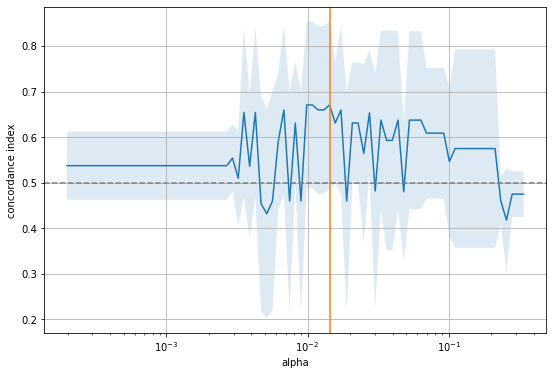

In [78]:
alphas = cv_results.param_coxnetsurvivalanalysis__alphas.map(lambda x: x[0])
mean = cv_results.mean_test_score
std = cv_results.std_test_score

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(alphas, mean)
ax.fill_between(alphas, mean - std, mean + std, alpha=.15)
ax.set_xscale("log")
ax.set_ylabel("concordance index")
ax.set_xlabel("alpha")
ax.axvline(gcv.best_params_["coxnetsurvivalanalysis__alphas"][0], c="C1")
ax.axhline(0.5, color="grey", linestyle="--")
ax.grid(True)

Number of non-zero coefficients: 6


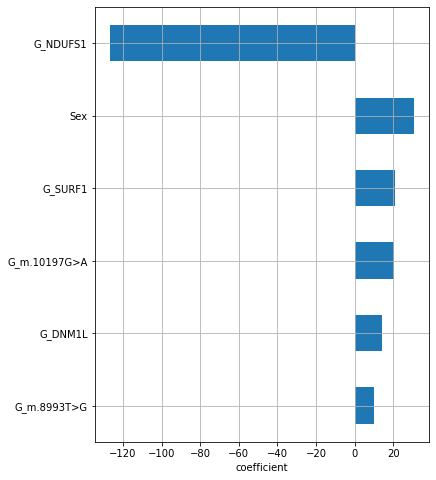

In [79]:
best_model = gcv.best_estimator_.named_steps["coxnetsurvivalanalysis"]
best_coefs = pd.DataFrame(
    best_model.coef_,
    index=X_train.columns,
    columns=["coefficient"]
)

non_zero = np.sum(best_coefs.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

non_zero_coefs = best_coefs.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

In [80]:
non_zero_coefs.sort_values(by='coefficient',ascending=False)

,coefficient
Sex,30.779195
G_SURF1,21.085969
G_m.10197G>A,20.301600
G_DNM1L,14.240766
G_m.8993T>G,10.042984
G_NDUFS1,-126.809599


In [81]:
prediction =  gcv.best_estimator_.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0]) 

concordance index: 0.9444444444444444


In [82]:
survs = gcv.best_estimator_.predict_survival_function(X_test)
preds = [fn(4) for fn in survs]
score = brier_score(y_train,y_test, preds,4)

print("4 year Brier score:",score[1])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

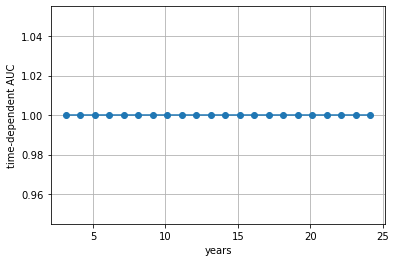

In [92]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(2.1232876712328768, 24.304109589041097)

gcv_auc, gcv_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, gcv_auc, marker="o")
plt.axhline(gcv_mean_auc, linestyle="--")
plt.xlabel("years")
plt.ylabel("time-dependent AUC")
plt.grid(True)

## Survival Analysis 2.4 : AFT with inverse probability of censoring weights

In [93]:
from sksurv.linear_model import IPCRidge

ipc = IPCRidge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto')
ipc.fit(X_train, y_train)

IPCRidge()

In [94]:
coef= ipc.coef_
coefficients = pd.DataFrame(coef,columns=['coefficient'],index=X_train.columns)

Number of non-zero coefficients: 6


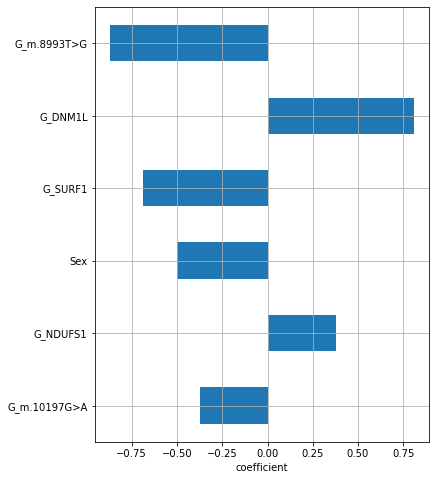

In [95]:
non_zero = np.sum(coefficients.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

non_zero_coefs = coefficients.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

In [96]:
non_zero_coefs.sort_values(by='coefficient',ascending=False)

,coefficient
G_DNM1L,0.810139
G_NDUFS1,0.378485
G_m.10197G>A,-0.372610
Sex,-0.499121
G_SURF1,-0.690453
G_m.8993T>G,-0.871222


In [97]:
prediction = ipc.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0])

concordance index: 0.16666666666666666


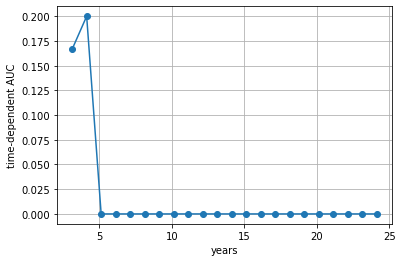

In [98]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(2.1232876712328768, 24.304109589041097)

ipc_auc, ipc_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, ipc_auc, marker="o")
plt.axhline(ipc_mean_auc, linestyle="--")
plt.xlabel("years")
plt.ylabel("time-dependent AUC")
plt.grid(True)

## Survival Analysis 2.5 : Componentwise Gradient Boosting 

In [133]:
from sksurv.ensemble import ComponentwiseGradientBoostingSurvivalAnalysis
cgb = ComponentwiseGradientBoostingSurvivalAnalysis(loss='coxph', learning_rate=0.1, n_estimators=100, subsample=1.0, dropout_rate=0, random_state=None, verbose=0)
cgb.fit(X_train, y_train)

ComponentwiseGradientBoostingSurvivalAnalysis()

Number of non-zero coefficients: 4


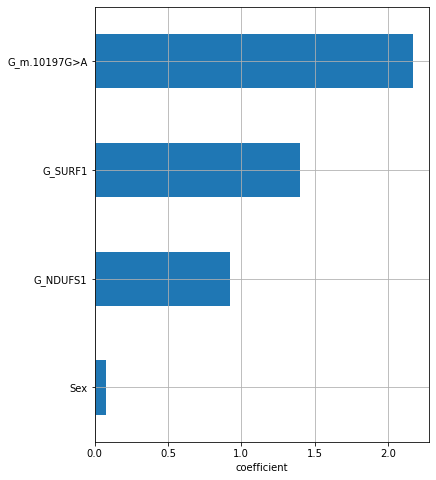

In [134]:
coef= cgb.coef_
coefficients = pd.DataFrame(coef[1:],columns=['coefficient'],index=X_train.columns)

non_zero = np.sum(coefficients.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

non_zero_coefs = coefficients.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

In [135]:
non_zero_coefs.sort_values(by='coefficient',ascending=False)

,coefficient
G_m.10197G>A,2.172979
G_SURF1,1.402506
G_NDUFS1,0.920349
Sex,0.077187


In [136]:
prediction = cgb.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0])

concordance index: 0.9444444444444444


In [137]:
survs = cgb.predict_survival_function(X_test)
preds = [fn(4) for fn in survs]
score = brier_score(y_train,y_test, preds,4)

print("4 year Brier score:",score[1])

4 year Brier score: [0.0471589]


In [138]:
survs = cph.predict_survival_function(X_test)
preds = [fn(10) for fn in survs]
score = brier_score(y_train,y_test, preds,10)

print("10 year Brier score:",score[1])

10 year Brier score: [0.01523705]


In [141]:
survs = cph.predict_survival_function(X_test)
preds = [fn(17) for fn in survs]
score = brier_score(y_train,y_test, preds,17)

print("17 year Brier score:",score[1])

17 year Brier score: [0.01967283]


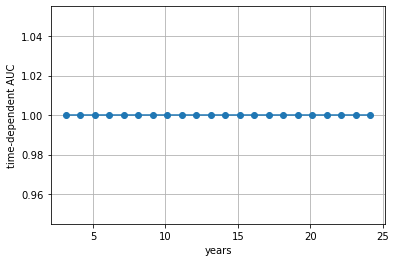

In [142]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(2.1232876712328768, 24.304109589041097)

cgb_auc, cgb_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, cgb_auc, marker="o")
plt.axhline(cgb_mean_auc, linestyle="--")
plt.xlabel("years")
plt.ylabel("time-dependent AUC")
plt.grid(True)

## Survival Analysis 2.6: Random Survival Forest 

In [143]:
from sksurv.ensemble import RandomSurvivalForest



rsf = RandomSurvivalForest(n_estimators=50,
                           min_samples_split=8,
                           min_samples_leaf=4,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=random_state,
                           verbose=1)

rsf.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


RandomSurvivalForest(max_features='sqrt', min_samples_leaf=4,
                     min_samples_split=8, n_estimators=50, n_jobs=-1,
                     random_state=0, verbose=1)

In [144]:
prediction = rsf.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0])


concordance index: 0.8333333333333334


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [147]:
survs = rsf.predict_survival_function(X_test)
preds = [fn(4) for fn in survs]
score = brier_score(y_train,y_test, preds,4)

print("4 year Brier score:",score[1])

4 year Brier score: [0.07770946]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [148]:
survs = rsf.predict_survival_function(X_test)
preds = [fn(10) for fn in survs]
score = brier_score(y_train,y_test, preds,10)

print("10 year Brier score:",score[1])

10 year Brier score: [0.08069515]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [151]:
survs = rsf.predict_survival_function(X_test)
preds = [fn(17) for fn in survs]
score = brier_score(y_train,y_test, preds,17)

print("17 year Brier score:",score[1])

17 year Brier score: [0.07779329]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


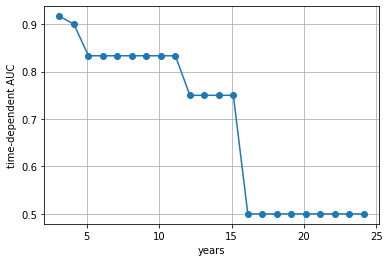

In [108]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(2.1232876712328768, 24.304109589041097)

rsf_auc, rsf_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, rsf_auc, marker="o")
plt.axhline(rsf_mean_auc, linestyle="--")
plt.xlabel("years")
plt.ylabel("time-dependent AUC")
plt.grid(True)

In [109]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(rsf, n_iter=15, random_state=0)
perm.fit(X_test, y_test)
feature_names = X_test.columns.tolist()
eli5.show_weights(perm, feature_names=feature_names)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


Weight,Feature
0.2556 ± 0.4441,Sex
0.1444 ± 0.6029,G_NDUFV1
0.0593 ± 0.1248,G_m.8993T>G
0 ± 0.0000,G_NARS2
0 ± 0.0000,G_NDUFAF7
0 ± 0.0000,G_NDUFS1
0 ± 0.0000,G_NDUFS2
0 ± 0.0000,G_NDUFS7
0 ± 0.0000,G_PDH Deficiency
0 ± 0.0000,G_m.13051G>A


## Feature Selection 

In [98]:
# Preparing data for survival analysis 
surv_df = df_condensed

# Removing records with dates prior to birth date
surv_df = surv_df[surv_df["Date"] > surv_df["Birth_date"]] 

# Keeping last date seen 
surv_df = surv_df.sort_values(by="Date").drop_duplicates(subset=["UniqueID"], keep="last")

# Calculating patient age at date of visit/record
surv_df['Age'] = surv_df.apply(lambda x: x['Death_date']-x['Birth_date'] \
                               if(pd.notnull(x['Death_date'])) \
                               else x['Date']- x['Birth_date'], axis = 1)
# Converting Age to Years
surv_df['Age'] = surv_df['Age'].astype('timedelta64[D]').astype(int)
surv_df['Age'] = surv_df['Age']/365

# Recording Event - Death or Right Censored
surv_df['Event'] =  surv_df.apply(lambda x: 0 \
                               if(pd.isnull(x['Death_date'])) \
                               else 1, axis = 1)
# Dropping unecessary columns 
surv_df.drop(columns=['Birth_date','Death_date','Date','UniqueID','Institution'],inplace=True)


# Feature Engineering
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
surv_df['Sex'] = labelencoder.fit_transform(surv_df['Sex'])

surv_df['Genetics']=surv_df['Genetics'].replace({'Unknown':9,'Other':9})

surv_df = pd.get_dummies(surv_df,columns=['Genetics'],drop_first=True,prefix='G')

In [99]:
# Feature selection
surv_df = surv_df[['Sex','Age','Event','G_NDUFS1', 'G_SURF1','G_m.10197G>A','G_m.8993T>G']]

In [100]:
surv_df.shape

(55, 7)

In [101]:
import numpy as np
from sklearn.model_selection import train_test_split

random_state = 0

df_train, df_test = train_test_split(surv_df,test_size=0.2, random_state=random_state)

X_train = df_train.drop(columns = ['Event','Age'])
y_train = df_train[['Event','Age']]
X_test = df_test.drop(columns = ['Event','Age'])
y_test = df_test[['Event','Age']]

# Formatting y dataframe into tuple array 
y_train['Event'] = y_train['Event'].replace([1],True)
y_train['Event'] = y_train['Event'].replace([0],False)
y_train = y_train.to_records(index=False)

y_test['Event'] = y_test['Event'].replace([1],True)
y_test['Event'] = y_test['Event'].replace([0],False)
y_test = y_test.to_records(index=False)

## Survival Analysis 3.1: Cox-Proportional Hazards Model 

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sklearn.model_selection import GridSearchCV, KFold

cph = CoxPHSurvivalAnalysis()
cph.fit(X_train, y_train)

CoxPHSurvivalAnalysis()

In [103]:
coef= cph.coef_
coefficients = pd.DataFrame(coef,columns=['coefficient'],index=X_train.columns)
coefficients.sort_values(by='coefficient',ascending=False)

,coefficient
G_NDUFS1,3.128327
G_m.10197G>A,2.943038
G_SURF1,2.825082
Sex,1.707224
G_m.8993T>G,1.435586


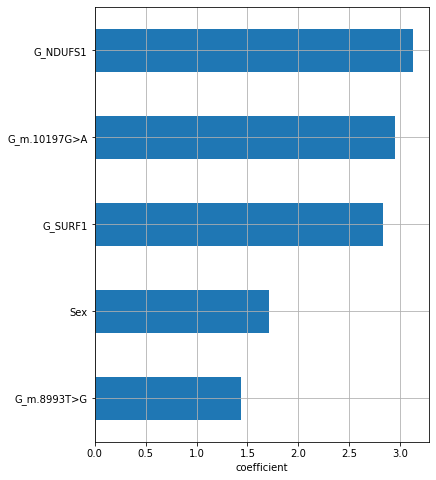

In [104]:
coef_order = coefficients.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
coefficients.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

In [105]:
from sksurv.metrics import concordance_index_censored

prediction = cph.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print ('concordance index:', result[0])

concordance index: 0.9444444444444444


In [106]:
survs = cph.predict_survival_function(X_test)
preds = [fn(4) for fn in survs]
score = brier_score(y_train,y_test, preds,4)

print("4 year Brier score:",score[1])

4 year Brier score: [0.01634604]


In [107]:
survs = cph.predict_survival_function(X_test)
preds = [fn(10) for fn in survs]
score = brier_score(y_train,y_test, preds,10)

print("10 year Brier score:",score[1])

10 year Brier score: [0.008953]


In [108]:
survs = cph.predict_survival_function(X_test)
preds = [fn(17) for fn in survs]
score = brier_score(y_train,y_test, preds,17)

print("17 year Brier score:",score[1])

17 year Brier score: [0.00864617]


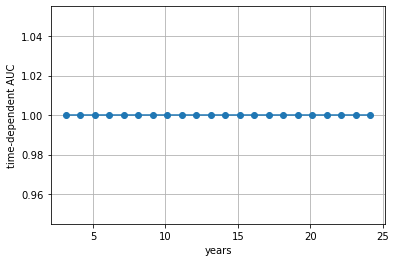

In [109]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(2.1232876712328768, 24.304109589041097)

cph_auc, cph_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, cph_auc, marker="o")
plt.axhline(cph_mean_auc, linestyle="--")
plt.xlabel("years")
plt.ylabel("time-dependent AUC")
plt.grid(True)

## Survival Analysis 3.2 : Coxnet 

In [110]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

coxnet_pipe = make_pipeline(
    StandardScaler(),
    CoxnetSurvivalAnalysis()
)
warnings.simplefilter("ignore", ConvergenceWarning)
coxnet_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis', CoxnetSurvivalAnalysis())])

In [111]:
estimated_alphas = coxnet_pipe.named_steps["coxnetsurvivalanalysis"].alphas_
cv = KFold(n_splits=5, shuffle=True, random_state=random_state)
gcv = GridSearchCV(
    make_pipeline(StandardScaler(), CoxnetSurvivalAnalysis(fit_baseline_model=True)),
    param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas]},
    cv=cv,
    error_score=0.5,
    n_jobs=4).fit(X_train, y_train)

cv_results = pd.DataFrame(gcv.cv_results_)

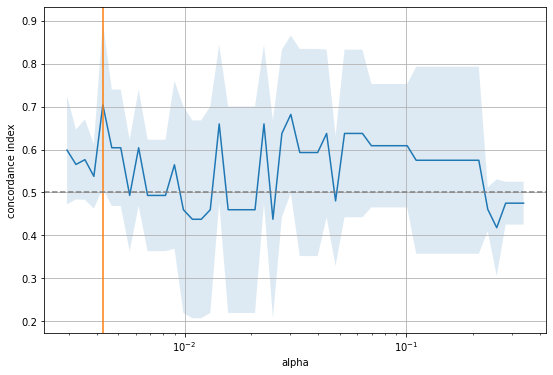

In [112]:
alphas = cv_results.param_coxnetsurvivalanalysis__alphas.map(lambda x: x[0])
mean = cv_results.mean_test_score
std = cv_results.std_test_score

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(alphas, mean)
ax.fill_between(alphas, mean - std, mean + std, alpha=.15)
ax.set_xscale("log")
ax.set_ylabel("concordance index")
ax.set_xlabel("alpha")
ax.axvline(gcv.best_params_["coxnetsurvivalanalysis__alphas"][0], c="C1")
ax.axhline(0.5, color="grey", linestyle="--")
ax.grid(True)

Number of non-zero coefficients: 4


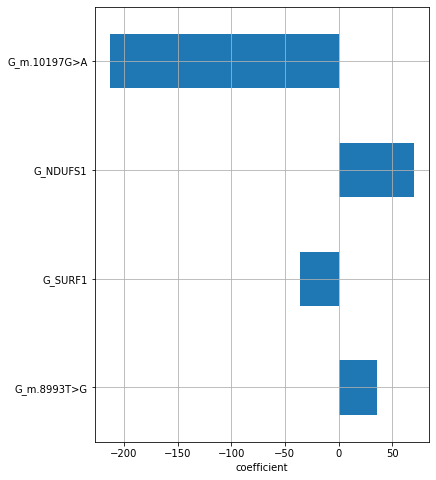

In [113]:
best_model = gcv.best_estimator_.named_steps["coxnetsurvivalanalysis"]
best_coefs = pd.DataFrame(
    best_model.coef_,
    index=X_train.columns,
    columns=["coefficient"]
)

non_zero = np.sum(best_coefs.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

non_zero_coefs = best_coefs.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

In [114]:
non_zero_coefs.sort_values(by='coefficient',ascending=False)

,coefficient
G_NDUFS1,70.394498
G_m.8993T>G,36.011696
G_SURF1,-36.011696
G_m.10197G>A,-213.183495


In [116]:
prediction =  gcv.best_estimator_.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0]) 

concordance index: 0.1111111111111111


In [117]:
survs = gcv.best_estimator_.predict_survival_function(X_test)
preds = [fn(4) for fn in survs]
score = brier_score(y_train,y_test, preds,4)

print("4 year Brier score:",score[1])

4 year Brier score: [0.09307359]


In [118]:
survs = gcv.best_estimator_.predict_survival_function(X_test)
preds = [fn(10) for fn in survs]
score = brier_score(y_train,y_test, preds,10)

print("10 year Brier score:",score[1])

10 year Brier score: [0.09307359]


In [119]:
survs = gcv.best_estimator_.predict_survival_function(X_test)
preds = [fn(17) for fn in survs]
score = brier_score(y_train,y_test, preds,17)

print("17 year Brier score:",score[1])

17 year Brier score: [0.09307359]


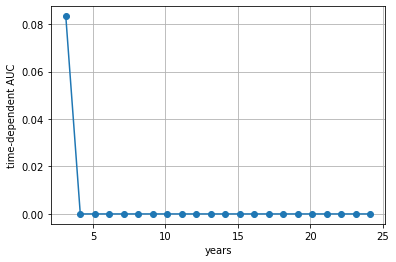

In [120]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(2.1232876712328768, 24.304109589041097)

gcv_auc, gcv_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, gcv_auc, marker="o")
plt.axhline(gcv_mean_auc, linestyle="--")
plt.xlabel("years")
plt.ylabel("time-dependent AUC")
plt.grid(True)

## Survival Analysis 3.3 : AFT with IPC Ridge 

In [120]:
from sksurv.linear_model import IPCRidge

ipc = IPCRidge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto')
ipc.fit(X_train, y_train)

IPCRidge()

In [121]:
coef= ipc.coef_
coefficients = pd.DataFrame(coef,columns=['coefficient'],index=X_train.columns)
coefficients.sort_values(by='coefficient',ascending=False)

,coefficient
G_NDUFS1,0.273777
Sex,-0.075169
G_m.10197G>A,-0.659530
G_SURF1,-1.002166
G_m.8993T>G,-1.144711


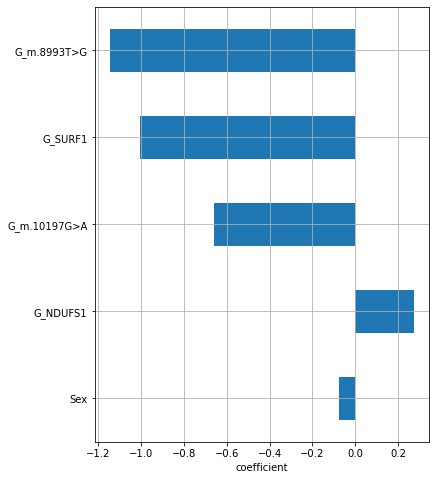

In [122]:
coef_order = coefficients.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
coefficients.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

In [123]:
from sksurv.metrics import concordance_index_censored

prediction = ipc.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print ('concordance index:', result[0])

concordance index: 0.16666666666666666


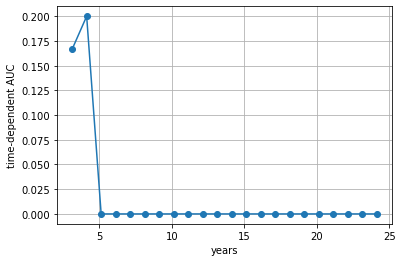

In [124]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(2.1232876712328768, 24.304109589041097)

ipc_auc, ipc_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, ipc_auc, marker="o")
plt.axhline(ipc_mean_auc, linestyle="--")
plt.xlabel("years")
plt.ylabel("time-dependent AUC")
plt.grid(True)

## Survival Analysis 3.3: Componentwise Gradient Boosting 

In [121]:
from sksurv.ensemble import ComponentwiseGradientBoostingSurvivalAnalysis
cgb = ComponentwiseGradientBoostingSurvivalAnalysis(loss='coxph', learning_rate=0.1, n_estimators=100, subsample=1.0, dropout_rate=0, random_state=None, verbose=0)
cgb.fit(X_train, y_train)

ComponentwiseGradientBoostingSurvivalAnalysis()

In [123]:
coef= cgb.coef_
coefficients = pd.DataFrame(coef[1:],columns=['coefficient'],index=X_train.columns)
coefficients.sort_values(by='coefficient',ascending=False)

,coefficient
G_m.10197G>A,2.172979
G_SURF1,1.402506
G_NDUFS1,0.920349
Sex,0.077187
G_m.8993T>G,0.000000


Number of non-zero coefficients: 4


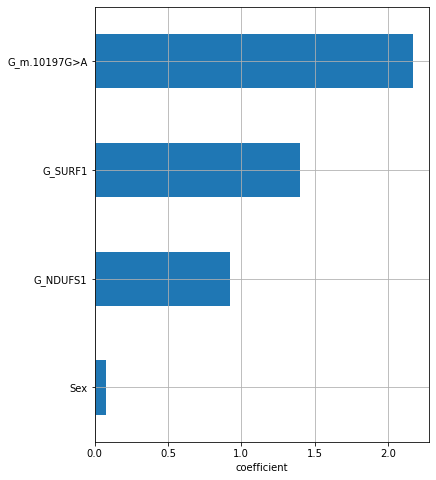

In [124]:
coef= cgb.coef_
coefficients = pd.DataFrame(coef[1:],columns=['coefficient'],index=X_train.columns)

non_zero = np.sum(coefficients.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

non_zero_coefs = coefficients.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

In [125]:
prediction = cgb.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0])

concordance index: 0.9444444444444444


In [129]:
survs = cgb.predict_survival_function(X_test)
preds = [fn(4) for fn in survs]
score = brier_score(y_train,y_test, preds,4)

print("4 year Brier score:",score[1])

4 year Brier score: [0.0471589]


In [130]:
survs = cgb.predict_survival_function(X_test)
preds = [fn(10) for fn in survs]
score = brier_score(y_train,y_test, preds,10)

print("10 year Brier score:",score[1])

10 year Brier score: [0.04894815]


In [131]:
survs = cgb.predict_survival_function(X_test)
preds = [fn(17) for fn in survs]
score = brier_score(y_train,y_test, preds,17)

print("17 year Brier score:",score[1])

17 year Brier score: [0.03400498]


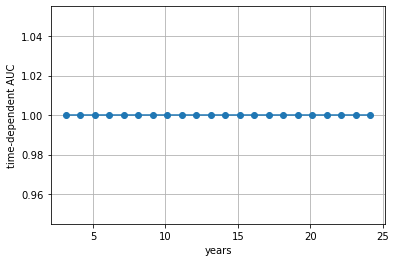

In [130]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(2.1232876712328768, 24.304109589041097)

cgb_auc, cgb_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, cgb_auc, marker="o")
plt.axhline(cgb_mean_auc, linestyle="--")
plt.xlabel("years")
plt.ylabel("time-dependent AUC")
plt.grid(True)

## Survival Analysis 3.4: Random Survival Forest 

In [132]:
from sksurv.ensemble import RandomSurvivalForest



rsf = RandomSurvivalForest(n_estimators=50,
                           min_samples_split=8,
                           min_samples_leaf=4,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=random_state,
                           verbose=1)

rsf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


RandomSurvivalForest(max_features='sqrt', min_samples_leaf=4,
                     min_samples_split=8, n_estimators=50, n_jobs=-1,
                     random_state=0, verbose=1)

In [133]:
prediction = rsf.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0])

concordance index: 0.9444444444444444


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [134]:
survs = rsf.predict_survival_function(X_test)
preds = [fn(4) for fn in survs]
score = brier_score(y_train,y_test, preds,4)

print("4 year Brier score:",score[1])

4 year Brier score: [0.06731066]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [137]:
survs = rsf.predict_survival_function(X_test)
preds = [fn(10) for fn in survs]
score = brier_score(y_train,y_test, preds,10)

print("10 year Brier score:",score[1])

10 year Brier score: [0.0698109]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [138]:
survs = rsf.predict_survival_function(X_test)
preds = [fn(17) for fn in survs]
score = brier_score(y_train,y_test, preds,17)

print("17 year Brier score:",score[1])

17 year Brier score: [0.07126444]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


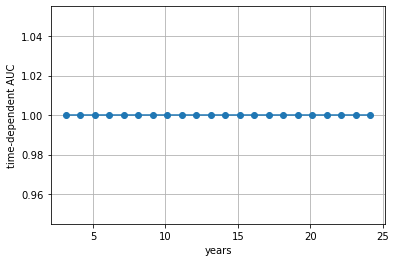

In [134]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(2.1232876712328768, 24.304109589041097)

rsf_auc, rsf_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, rsf_auc, marker="o")
plt.axhline(rsf_mean_auc, linestyle="--")
plt.xlabel("years")
plt.ylabel("time-dependent AUC")
plt.grid(True)

In [135]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(rsf, n_iter=15, random_state=0)
perm.fit(X_test, y_test)
feature_names = X_test.columns.tolist()
eli5.show_weights(perm, feature_names=feature_names)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_job

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job

Weight,Feature
0.3333 ± 0.3828,G_SURF1
0.0741 ± 0.1325,Sex
0 ± 0.0000,G_m.8993T>G
0 ± 0.0000,G_m.10197G>A
0 ± 0.0000,G_NDUFS1


## Data Cleaning for NPMDS data 

In [139]:
npmds.head(3)

,Unique ID,Date,NPMDS,Scaled score,Retrospective scale 1,Retrospective scale 1 question 1,Retrospective scale 1 question 2,Retrospective scale 1 question 3,Retrospective scale 1 question 4,Retrospective scale 1 question 5,Retrospective scale 1 question 6,Retrospective scale 1 question 7,Retrospective scale 1 question 8,Retrospective scale 1 question 9,Retrospective scale 1 question 10,Retrospective scale 1 question 11,Retrospective scale 1 question 12,Retrospective scale 1 question 13,Retrospective scale 1 question 14,Retrospective scale 1 question 15,Retrospective scale 1 question 16,Retrospective scale 1 question 17,Retrospective scale 1 question 18,Retrospective scale 1 question 19,Retrospective scale 1 question 20,Retrospective scale 1 question 21,Retrospective scale 1 question 22,Retrospective scale 1 question 23,Retrospective scale 1 question 24,Retrospective scale 1 question 25,Retrospective scale 1 question 26,Retrospective scale 2,Retrospective scale 2 question 1,Retrospective scale 2 question 2,Retrospective scale 2 question 3,Retrospective scale 2 question 4,Retrospective scale 2 question 5,Retrospective scale 2 question 6,Retrospective scale 2 question 7,Retrospective scale 2 question 8,Retrospective scale 2 question 9,Retrospective scale 2 question 10,Retrospective scale 2 question 11,Retrospective scale 2 question 12,Retrospective scale 2 question 13,Retrospective scale 2 question 14,Retrospective scale 2 question 15,Retrospective scale 2 question 16,Retrospective scale 2 question 17,Retrospective scale 2 question 18,Retrospective scale 2 question 19,Retrospective scale 2 question 20,Retrospective scale 2 question 21,Retrospective scale 2 question 22,Retrospective scale 2 question 23,Retrospective scale 2 question 24,Retrospective scale 2 question 25,Retrospective scale 2 question 26,Retrospective scale 3,Retrospective scale 3 question 1,Retrospective scale 3 question 2,Retrospective scale 3 question 3,Retrospective scale 3 question 4,Retrospective scale 3 question 5,Retrospective scale 3 question 6,Retrospective scale 3 question 7,Retrospective scale 3 question 8,Retrospective scale 3 question 9,Retrospective scale 3 question 10,Retrospective scale 3 question 11,Retrospective scale 3 question 12,Retrospective scale 3 question 13,Retrospective scale 3 question 14,Retrospective scale 3 question 15,Retrospective scale 3 question 16,Retrospective scale 3 question 17,Retrospective scale 3 question 18,Retrospective scale 3 question 19,Retrospective scale 3 question 20,Retrospective scale 3 question 21,Retrospective scale 3 question 22,Retrospective scale 3 question 23,Retrospective scale 3 question 24,Retrospective scale 3 question 25,Retrospective scale 3 question 26,NPMDS (0-24 months),NPMDS (0-24m) questions,Current function,1. Vision,2. Hearing,3. Communication,4. Feeding,5. Mobility,System specific involvement,1. Seizures,2. Encephalopathy,3. Gastrointestinal,4. Endocrine,5. Respiratory,6. Cardiovascular,7. Renal,8. Liver,9. Blood,Current clinical assessment,1. Growth,2. Development,3. Vision,4. Ptosis,5. Myopathy,6. Pyramidal,7. Extrapyramidal,8. Neuropathy,Quality of Life (Parent,0-24m),Child's overall health,Child's limitations in physical activities,Child's energy levels,Child's bodily pain,Child's behaviour,Child's interaction with others,Parent's emotional difficulty because of child,Time limited because of child,Family activity limited because of child,Financial cost,Ability of family to get along,Positive effects of illness,NPMDS (2-11 years),NPMDS (2-11) questions,Current function.1,1. Vision.1,2. Hearing.1,3. Communication.1,4. Feeding.1,5. Self-care,6. Mobility,7. Educational achievement,System specific involvement.1,1. Seizures.1,2. Encephalopathy.1,3. Stroke-like episodes,4. Gastrointestinal,5. Endocrine,6. Respiratory,7. Cardiovascular,8. Renal,9. Liver,10. Blood,Current clinical assessment.1,1. Growth.1,2. Development.1,3. Vision.1,4. Ptosis.1,5. Myopathy.1,6. Ataxia,7. Pyramidal,8. Extrapyramidal,

In [140]:
# Functions to combine same columns in NPMDS across different age ranges
def npmds_combine (col1,col2,col3):
    npmds[col1].update(npmds.pop(col2))
    npmds[col1].update(npmds.pop(col3))

def npmds_combine2 (col1,col2):
    npmds[col1].update(npmds.pop(col2))


In [141]:
# Combine columns with 3 repeats across different age groups 
npmds_combine('1. Vision','1. Vision.1','1. Vision.2')
npmds_combine('2. Hearing','2. Hearing.1','2. Hearing.2')
npmds_combine('3. Communication','3. Communication.1','3. Communication.2')
npmds_combine('4. Feeding','4. Feeding.1','4. Feeding.2')
npmds_combine('5. Mobility','6. Mobility.1','6. Mobility')
npmds_combine('1. Seizures','1. Seizures.1','1. Seizures.2')
npmds_combine('2. Encephalopathy','2. Encephalopathy.1','2. Encephalopathy.2')
npmds_combine('3. Gastrointestinal','4. Gastrointestinal','4. Gastrointestinal.1')
npmds_combine('4. Endocrine','5. Endocrine','5. Endocrine.1')
npmds_combine('5. Respiratory','6. Respiratory','6. Respiratory.1')
npmds_combine('6. Cardiovascular','7. Cardiovascular','7. Cardiovascular.1')
npmds_combine('7. Renal','8. Renal','8. Renal.1')
npmds_combine('8. Liver','9. Liver','9. Liver.1')
npmds_combine('9. Blood','10. Blood','10. Blood.1')

npmds_combine('1. Growth','1. Growth.1','1. Growth.2')
npmds_combine('2. Development','2. Development.1','2. Development.2')
npmds_combine('3. Vision','3. Vision.1','3. Vision.2')
npmds_combine('4. Ptosis','4. Ptosis.1','4. Ptosis.2')
npmds_combine('5. Myopathy','5. Myopathy.1','5. Myopathy.2')
npmds_combine('6. Pyramidal','7. Pyramidal','7. Pyramidal.1')
npmds_combine('7. Extrapyramidal','8. Extrapyramidal','8. Extrapyramidal.1')
npmds_combine('8. Neuropathy','9. Neuropathy','9. Neuropathy.1')

npmds_combine("Child's overall health","Child's overall health.1","Child's overall health.2")
npmds_combine("Child's limitations in physical activities","Child's limitations in physical activities.1","Child's limitations in physical activities.2")
npmds_combine("Child's energy levels","Child's energy levels.1","Child's energy levels.2")
npmds_combine("Child's bodily pain","Child's bodily pain.1","Child's bodily pain.2")
npmds_combine("Child's behaviour","Child's behaviour.1","Child's behaviour.2")
npmds_combine("Child's interaction with others","Child's interaction with others.1","Child's interaction with others.2")
npmds_combine("Parent's emotional difficulty because of child","Parent's emotional difficulty because of child.1","Parent's emotional difficulty because of child.2")
npmds_combine('Time limited because of child','Time limited because of child.1','Time limited because of child.2')
npmds_combine('Family activity limited because of child','Family activity limited because of child.1','Family activity limited because of child.2')
npmds_combine('Financial cost','Financial cost.1','Financial cost.2')
npmds_combine('Ability of family to get along','Ability of family to get along.1','Ability of family to get along.3')
npmds_combine('Positive effects of illness','Positive effects of illness.1','Positive effects of illness.3')

In [142]:
# Combine columns with 2 repeats across different age groups  


npmds_combine2('5. Self-care','5. Self-care.1')
npmds_combine2('7. Educational achievement','7. Educational achievement.1')
npmds_combine2('System specific involvement.1','System specific involvement.2')
npmds_combine2('3. Stroke-like episodes','3. Stroke-like episodes.1')
npmds_combine2('6. Ataxia','6. Ataxia.1')



npmds_combine2("Child's limitations in everyday life","Child's limitations in everyday life.1")
npmds_combine2('Child bothered by emotional problems during past 4 weeks','Child bothered by emotional problems during past 4 weeks.1')
npmds_combine2("Child's satisfaction with themselves","Child's satisfaction with themselves.1")



npmds_combine2('Overall health','Overall health.1')
npmds_combine2('Limitations in physical activities','Limitations in physical activities.1')
npmds_combine2('Limitations in everyday life','Limitations in everyday life.1')
npmds_combine2('Energy levels','Energy levels.1')
npmds_combine2('Bodily pain','Bodily pain.1')
npmds_combine2('Emotional difficulty','Emotional difficulty.1')
npmds_combine2('Satisfaction with self','Satisfaction with self.1')
npmds_combine2('Behaviour','Behaviour.1')
npmds_combine2('Interaction with others','Interaction with others.1')
npmds_combine2('Ability of family to get along.2','Ability of family to get along.4')
npmds_combine2('Positive effects of illness.2','Positive effects of illness.4')


In [143]:
npmds = npmds.add_suffix('_npmds')
npmds.rename(columns={ 'Unique ID_npmds':'Unique ID','Date_npmds':'Date',
                    '1. Vision_npmds':'Vision_npmds_self',
                    '2. Hearing_npmds':'Hearing_npmds',
                    '3. Communication_npmds':'Communication_npmds',
                    '4. Feeding_npmds':'Feeding_npmds',
                    '5. Mobility_npmds':'Mobility_npmds',
                    '1. Seizures_npmds':'Seizures_npmds',
                    '2. Encephalopathy_npmds':'Encephalopathy_npmds',
                    '3. Gastrointestinal_npmds':'Gastrointestinal_npmds',
                    '4. Endocrine_npmds':'Endocrine_npmds',
                    '5. Respiratory_npmds':'Respiratory_npmds',
                    '6. Cardiovascular_npmds':'Cardiovascular_npmds',
                    '7. Renal_npmds':'Renal_npmds',
                    '8. Liver_npmds':'Liver_npmds',
                    '9. Blood_npmds':'Blood_npmds',
                    '1. Growth_npmds':'Growth_npmds',
                    '2. Development_npmds':'Development_npmds',
                    '3. Vision_npmds':'Vision_npmds',
                    '4. Ptosis_npmds':'Ptosis_npmds',
                    '5. Myopathy_npmds':'Myopathy_npmds',
                    '6. Pyramidal_npmds':'Pyramidal_npmds',
                    '7. Extrapyramidal_npmds':'Extrapyramidal_npmds',
                    '8. Neuropathy_npmds':'Neuropathy_npmds',
                    "Child's overall health_npmds":"Child's overall health_par",
                    "Child's limitations in physical activities_npmds":"Child's limitations in physical activities_par",
                    "Child's energy levels_npmds":"Child's energy levels_par",
                    "Child's bodily pain_npmds":"Child's bodily pain_par",
                    "Child's behaviour_npmds":"Child's behaviour_par",
                    "Child's interaction with others_npmds":"Child's interaction with others_par",
                    "Parent's emotional difficulty because of child_npmds":"Parent's emotional difficulty because of child_par",
                    'Time limited because of child_npmds':'Time limited because of child_par',
                    'Family activity limited because of child_npmds':'Family activity limited because of child_par',
                    'Financial cost_npmds':'Financial cost_par',
                    'Ability of family to get along_npmds':'Ability of family to get along_par',
                    'Positive effects of illness_npmds':'Positive effects of illness_par',   
                    '5. Self-care_npmds':'Self-care_npmds',
                    '7. Educational achievement_npmds':'Educational achievement_npmds',
                    '3. Stroke-like episodes_npmds':'Stroke-like episodes_npmds',
                    '6. Ataxia_npmds':'Ataxia_npmds', 
                    'Ability of family to get along.2_npmds':'Ability of family to get along_self',
                    'Positive effects of illness.2_npmds':'Positive effects of illness_self' },inplace=True)
 
    
    

### Handling missing data - NPMDS
Removing columns with more than 50% missing data

In [144]:
# dropping columns with all NA in NPMDS data
npmds.dropna(axis=1, how='all',inplace=True)


In [145]:
# dropping columns with more than 50% NA values
npmds.drop(columns = ['Positive effects of illness_self','NPMDS (2-11) questions_npmds',          
'Ability of family to get along_self','Interaction with others_npmds','Behaviour_npmds',             
'Satisfaction with self_npmds','NPMDS (2-11 years)_npmds','Emotional difficulty_npmds',                      
'Bodily pain_npmds','Energy levels_npmds','Limitations in everyday life_npmds',             
'Limitations in physical activities_npmds','Overall health_npmds'],inplace=True)  




In [146]:
npmds.shape


(27, 43)

In [147]:
print("Total number of patients in NPMDS data:",npmds['Unique ID'].nunique())


Total number of patients in NPMDS data: 20


In [148]:
npmds.drop(columns= ["Child's overall health_par",
                        "Child's limitations in physical activities_par",              
                        "Child's energy levels_par",                 
                        "Child's bodily pain_par",                                          
                        "Child's behaviour_par",                                          
                        "Child's interaction with others_par",                            
                        "Parent's emotional difficulty because of child_par",
                        "Time limited because of child_par",                         
                        "Family activity limited because of child_par",                    
                        "Financial cost_par",                                               
                        "Ability of family to get along_par",                               
                        "Positive effects of illness_par",                                   
                        "Self-care_npmds",                                                 
                        "Educational achievement_npmds",                                     
                        "Stroke-like episodes_npmds",                                      
                        "Ataxia_npmds",                                                     
                        "Child's limitations in everyday life_npmds",                    
                        "Child bothered by emotional problems during past 4 weeks_npmds",   
                        "Child's satisfaction with themselves_npmds"],inplace=True)



In [149]:
npmds_1=npmds.fillna(9)


In [150]:
npmds_1.rename(columns = {'Unique ID': 'UniqueID'},inplace=True)


In [151]:
# Merging both datasets together
npmds_combined =  pd.merge(npmds_1,all, on=["UniqueID"],how='left')



### Data Preparation for NPMDS

In [152]:
surv_df = npmds_combined
surv_df = surv_df[surv_df["Date"] > surv_df["Birth_date"]]
surv_df = surv_df.sort_values(by="Date").drop_duplicates(subset=["UniqueID"], keep="last")
surv_df['Age'] = surv_df.apply(lambda x: x['Death_date']-x['Birth_date'] \
                               if(pd.notnull(x['Death_date'])) \
                               else x['Date']- x['Birth_date'], axis = 1)

surv_df['Age'] = surv_df['Age'].astype('timedelta64[D]').astype(int)
surv_df['Age'] = surv_df['Age']/365

surv_df['Event'] =  surv_df.apply(lambda x: 0 \
                               if(pd.isnull(x['Death_date'])) \
                               else 1, axis = 1)

surv_df.drop(columns=['UniqueID','Birth_date','Death_date','Date','Institution'],inplace=True)

from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
surv_df['Sex'] = labelencoder.fit_transform(surv_df['Sex'])


In [153]:
surv_df.head(4)

,Vision_npmds_self,Hearing_npmds,Communication_npmds,Feeding_npmds,Mobility_npmds,Seizures_npmds,Encephalopathy_npmds,Gastrointestinal_npmds,Endocrine_npmds,Respiratory_npmds,Cardiovascular_npmds,Renal_npmds,Liver_npmds,Blood_npmds,Growth_npmds,Development_npmds,Vision_npmds,Ptosis_npmds,Myopathy_npmds,Pyramidal_npmds,Extrapyramidal_npmds,Neuropathy_npmds,Sex,Age,Event
4,0.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,5.0,0.0,1.0,1.0,0.0,2.0,0.0,1,1.221918,0
10,1.0,3.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,9.0,0.0,3.0,3.0,0.0,1.0,0,3.583562,0
11,2.0,1.0,3.0,3.0,3.0,3.0,9.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,3.0,2.0,0.0,1,1.178082,1
12,9.0,9.0,9.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0,3.654795,0


In [154]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(surv_df["Age"], event_observed=surv_df["Event"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 20 total observations, 16 right-censored observations>

<AxesSubplot:title={'center':'Survival plot of Leigh patients (NPMDS data)'}, xlabel='Age (years)', ylabel='Probability of survival'>

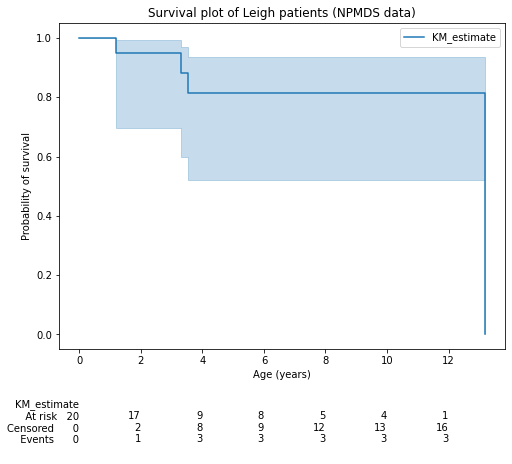

In [155]:
from matplotlib import pyplot as plt
from lifelines.plotting import add_at_risk_counts

plt.figure(figsize=(8,6))

kmf.plot_survival_function()
plt.title("Survival plot of Leigh patients (NPMDS data)");
plt.ylabel("Probability of survival")
plt.xlabel("Age (years)")

add_at_risk_counts(kmf)

Text(0.5, 0, 'Age (years)')

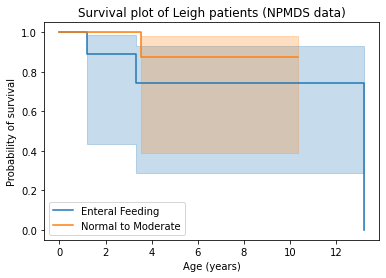

In [156]:
ax = plt.subplot(111)

feed = (surv_df["Feeding_npmds"] == 3)

T = surv_df["Age"]
E = surv_df["Event"]

kmf.fit(T[feed], event_observed=E[feed], label="Enteral Feeding")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~feed], event_observed=E[~feed], label="Normal to Moderate")
kmf.plot_survival_function(ax=ax)

plt.title("Survival plot of Leigh patients (NPMDS data)");
plt.ylabel("Probability of survival")
plt.xlabel("Age (years)")


In [157]:
from lifelines.statistics import logrank_test

results = logrank_test(T[feed], T[~feed], E[feed], E[~feed], alpha=.99)

results.print_summary()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.74 0.39      1.37

Text(0.5, 0, 'Age(years)')

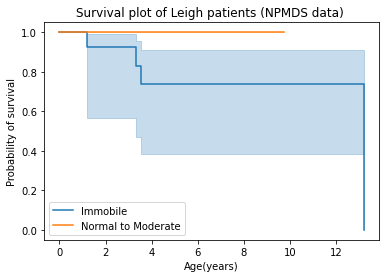

In [158]:
ax = plt.subplot(111)

mob = (surv_df["Mobility_npmds"] == 3)

T = surv_df["Age"]
E = surv_df["Event"]

kmf.fit(T[mob], event_observed=E[mob], label="Immobile")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~mob], event_observed=E[~mob], label="Normal to Moderate")
kmf.plot_survival_function(ax=ax)

plt.title("Survival plot of Leigh patients (NPMDS data) ");
plt.ylabel("Probability of survival")
plt.xlabel("Age(years)")



In [159]:
from lifelines.statistics import logrank_test

results = logrank_test(T[mob], T[~mob], E[mob], E[~mob], alpha=.99)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.38 0.24      2.06

Text(0.5, 0, 'Age(years)')

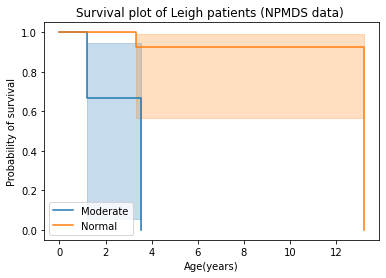

In [160]:
ax = plt.subplot(111)

vis = (surv_df["Vision_npmds_self"] == 2)

T = surv_df["Age"]
E = surv_df["Event"]

kmf.fit(T[vis], event_observed=E[vis], label="Moderate")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~vis], event_observed=E[~vis], label="Normal")
kmf.plot_survival_function(ax=ax)

plt.title("Survival plot of Leigh patients (NPMDS data) ");
plt.ylabel("Probability of survival")
plt.xlabel("Age(years)")



In [161]:
from lifelines.statistics import logrank_test

results = logrank_test(T[vis], T[~vis], E[vis], E[~vis], alpha=.99)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.93 <0.005     10.05

Text(0.5, 0, 'Age(years)')

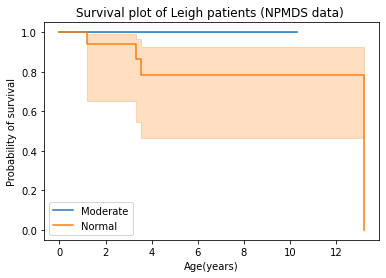

In [162]:
ax = plt.subplot(111)

pto = (surv_df["Ptosis_npmds"] == 2)

T = surv_df["Age"]
E = surv_df["Event"]

kmf.fit(T[pto], event_observed=E[pto], label="Moderate")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~pto], event_observed=E[~pto], label="Normal")
kmf.plot_survival_function(ax=ax)

plt.title("Survival plot of Leigh patients (NPMDS data) ");
plt.ylabel("Probability of survival")
plt.xlabel("Age(years)")



In [163]:
from lifelines.statistics import logrank_test

results = logrank_test(T[vis], T[~vis], E[vis], E[~vis], alpha=.99)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.93 <0.005     10.05

In [164]:
import numpy as np
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(surv_df,test_size=0.25, random_state=5)

X_train = df_train.drop(columns = ['Event','Age'])
y_train = df_train[['Event','Age']]
X_test = df_test.drop(columns = ['Event','Age'])
y_test = df_test[['Event','Age']]

In [165]:
# Formatting y dataframe into tuple array 
y_train['Event'] = y_train['Event'].replace([1],True)
y_train['Event'] = y_train['Event'].replace([0],False)
y_train = y_train.to_records(index=False)


## Time to Enteral Feeding 

In [166]:
npmds_2=npmds.fillna(9)
npmds_2.rename(columns = {'Unique ID': 'UniqueID'},inplace=True)
# Merging both datasets together
npmds_combined =  pd.merge(npmds_2,all[['UniqueID','Birth_date','Sex']], on=["UniqueID"],how='left')



In [167]:
surv_df = npmds_combined
surv_df = surv_df[surv_df["Date"] > surv_df["Birth_date"]]
surv_df['Age'] = surv_df.apply(lambda x: x['Date']-x['Birth_date'], axis = 1)
surv_df['Age'] = surv_df['Age'].astype('timedelta64[D]').astype(int)
surv_df['Age'] = surv_df['Age']/365

surv_df['Event'] =  surv_df.apply(lambda x: 1 \
                               if x['Feeding_npmds']== 3 \
                               else 0, axis = 1)

surv_df = surv_df.sort_values(by="Date").drop_duplicates(subset=["UniqueID","Event"], keep="first")
surv_df = surv_df.sort_values(by="Date").drop_duplicates(subset=["UniqueID"], keep="last")

surv_df.drop(columns=['UniqueID','Birth_date','Date','Feeding_npmds'],inplace=True)

from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
surv_df['Sex'] = labelencoder.fit_transform(surv_df['Sex'])


In [168]:
import numpy as np
from sklearn.model_selection import train_test_split

random_state=42

df_train, df_test = train_test_split(surv_df,test_size=0.3, random_state=random_state)

X_train = df_train.drop(columns = ['Event','Age'])
y_train = df_train[['Event','Age']]
X_test = df_test.drop(columns = ['Event','Age'])
y_test = df_test[['Event','Age']]

## Time to Enteral Feeding : Kaplan Meier Estimator

In [169]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

T = y_train["Age"]
E = y_train["Event"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 14 total observations, 7 right-censored observations>

Text(0.5, 0, 'Age (years)')

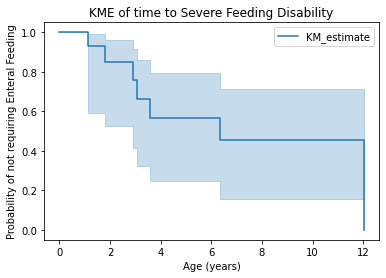

In [170]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,4))

kmf.plot_survival_function()
plt.title("KME of time to Severe Feeding Disability");
plt.ylabel("Probability of not requiring Enteral Feeding")
plt.xlabel("Age (years)")

In [171]:
kmf.median_survival_time_

6.326027397260274

## Time to Enteral Feeding : Cox-proportional Hazards model 

In [172]:
# Formatting y dataframe into tuple array 
y_train['Event'] = y_train['Event'].replace([1],True)
y_train['Event'] = y_train['Event'].replace([0],False)
y_train = y_train.to_records(index=False)


In [173]:
cph = CoxPHSurvivalAnalysis(alpha=0.1)
cph.fit(X_train, y_train)

CoxPHSurvivalAnalysis(alpha=0.1)

In [174]:
coef= cph.coef_
coefficients = pd.DataFrame(coef,columns=['coefficient'],index=X_train.columns)
coefficients.sort_values(by='coefficient',ascending=False)

,coefficient
Vision_npmds_self,3.865887
Development_npmds,1.039425
Vision_npmds,0.820447
Mobility_npmds,0.753882
Sex,0.730046
Cardiovascular_npmds,0.521952
Respiratory_npmds,0.494222
Growth_npmds,0.360489
Ptosis_npmds,0.279570
Encephalopathy_npmds,0.230627


In [175]:
from sksurv.metrics import concordance_index_censored

y_test['Event'] = y_test['Event'].replace([1],True)
y_test['Event'] = y_test['Event'].replace([0],False)
y_test = y_test.to_records(index=False)

prediction = cph.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print ('concordance index:', result[0])

concordance index: 0.6666666666666666


In [177]:
from sksurv.metrics import integrated_brier_score

survs = cph.predict_survival_function(X_test)
times = np.arange(3.2, 9)
preds = np.asarray([[fn(t) for t in times] for fn in survs])
score = integrated_brier_score(y_test,y_test, preds, times)

print("intergrated Brier score:",score)

intergrated Brier score: 0.4142460372645983


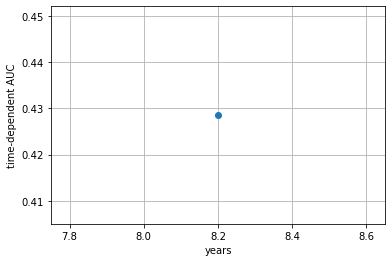

In [178]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(3.2, 9)

cph_auc, cph_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, cph_auc, marker="o")
plt.axhline(cph_mean_auc, linestyle="--")
plt.xlabel("years")
plt.ylabel("time-dependent AUC")
plt.grid(True)

## Time to Enteral Feeding : CoxNet 
Cox-PH with Elastic and 5-fold Crossvalidation

In [176]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

coxnet_pipe = make_pipeline(
    StandardScaler(),
    CoxnetSurvivalAnalysis()
)
warnings.simplefilter("ignore", ConvergenceWarning)
coxnet_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis', CoxnetSurvivalAnalysis())])

In [177]:
estimated_alphas = coxnet_pipe.named_steps["coxnetsurvivalanalysis"].alphas_
cv = KFold(n_splits=5, shuffle=True, random_state=random_state)
gcv = GridSearchCV(
    make_pipeline(StandardScaler(), CoxnetSurvivalAnalysis(fit_baseline_model = True)),
    param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas]},
    cv=cv,
    error_score=0.5,
    n_jobs=4).fit(X_train, y_train)

cv_results = pd.DataFrame(gcv.cv_results_)

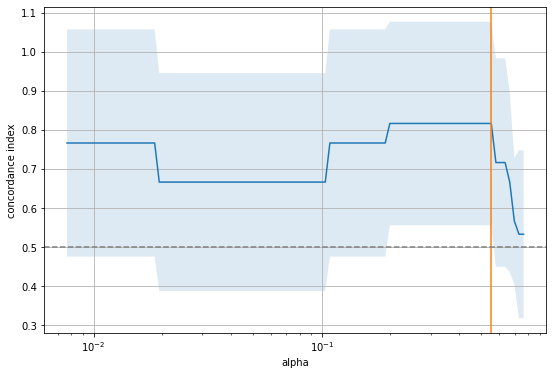

In [178]:
alphas = cv_results.param_coxnetsurvivalanalysis__alphas.map(lambda x: x[0])
mean = cv_results.mean_test_score
std = cv_results.std_test_score

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(alphas, mean)
ax.fill_between(alphas, mean - std, mean + std, alpha=.15)
ax.set_xscale("log")
ax.set_ylabel("concordance index")
ax.set_xlabel("alpha")
ax.axvline(gcv.best_params_["coxnetsurvivalanalysis__alphas"][0], c="C1")
ax.axhline(0.5, color="grey", linestyle="--")
ax.grid(True)

Number of non-zero coefficients: 3


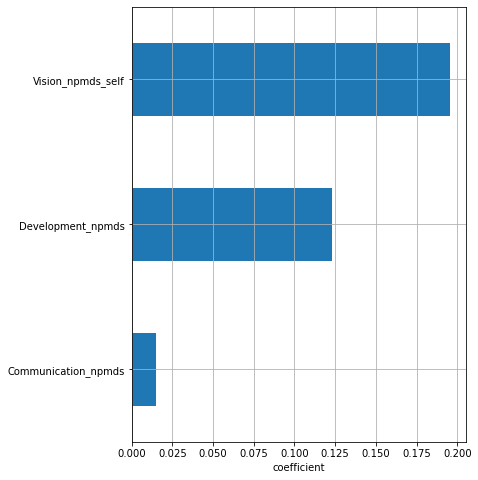

In [179]:
best_model = gcv.best_estimator_.named_steps["coxnetsurvivalanalysis"]
best_coefs = pd.DataFrame(
    best_model.coef_,
    index=X_train.columns,
    columns=["coefficient"]
)

non_zero = np.sum(best_coefs.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

non_zero_coefs = best_coefs.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)


In [181]:
non_zero_coefs.sort_values(by='coefficient',ascending=False)


,coefficient
Vision_npmds_self,0.195708
Development_npmds,0.122888
Communication_npmds,0.014721


In [182]:
prediction =  gcv.best_estimator_.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0]) 


concordance index: 1.0


In [183]:
from sksurv.metrics import integrated_brier_score

survs = gcv.best_estimator_.predict_survival_function(X_test)
times = np.arange(3.2, 9)
preds = np.asarray([[fn(t) for t in times] for fn in survs])
score = integrated_brier_score(y_test,y_test, preds, times)

print("intergrated Brier score:",score)

intergrated Brier score: 0.3954281228676124


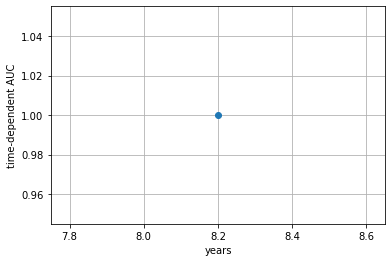

In [186]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(3.2, 9)

gcv_auc, gcv_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, gcv_auc, marker="o")
plt.axhline(gcv_mean_auc, linestyle="--")
plt.xlabel("years")
plt.ylabel("time-dependent AUC")
plt.grid(True)

## Time to Enteral Feeding : AFT with IPC Ridge

In [184]:
from sksurv.linear_model import IPCRidge

ipc = IPCRidge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto')
ipc.fit(X_train, y_train)

IPCRidge()

In [185]:
coef= ipc.coef_
coefficients = pd.DataFrame(coef,columns=['coefficient'],index=X_train.columns)
non_zero = np.sum(coefficients.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))


Number of non-zero coefficients: 18


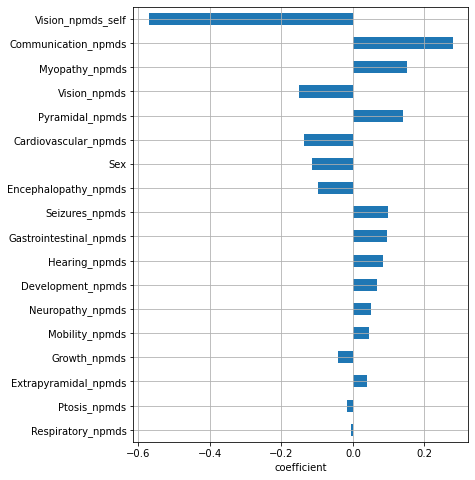

In [186]:
non_zero_coefs = coefficients.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

In [187]:
non_zero_coefs.sort_values(by='coefficient',ascending=False)

,coefficient
Communication_npmds,0.279793
Myopathy_npmds,0.151697
Pyramidal_npmds,0.139508
Seizures_npmds,0.096782
Gastrointestinal_npmds,0.096285
Hearing_npmds,0.082727
Development_npmds,0.067250
Neuropathy_npmds,0.050566
Mobility_npmds,0.045069
Extrapyramidal_npmds,0.038940


In [188]:
prediction = ipc.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0])

concordance index: 0.3333333333333333


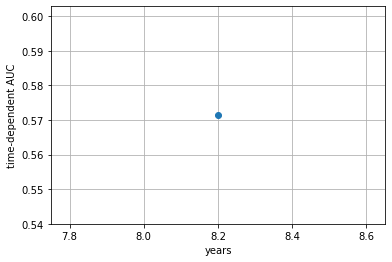

In [189]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(3.2, 9)

ipc_auc, ipc_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, ipc_auc, marker="o")
plt.axhline(ipc_mean_auc, linestyle="--")
plt.xlabel("years")
plt.ylabel("time-dependent AUC")
plt.grid(True)

## Time to Enteral Feeding: Componentwise Gradient Boosting 

In [190]:
from sksurv.ensemble import ComponentwiseGradientBoostingSurvivalAnalysis
cgb = ComponentwiseGradientBoostingSurvivalAnalysis(loss='coxph', learning_rate=0.1, n_estimators=100, subsample=1.0, dropout_rate=0, random_state=None, verbose=0)
cgb.fit(X_train, y_train)

ComponentwiseGradientBoostingSurvivalAnalysis()

In [191]:
coef= cgb.coef_
coefficients = pd.DataFrame(coef[1:],columns=['coefficient'],index=X_train.columns)

In [192]:
non_zero = np.sum(coefficients.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

Number of non-zero coefficients: 3


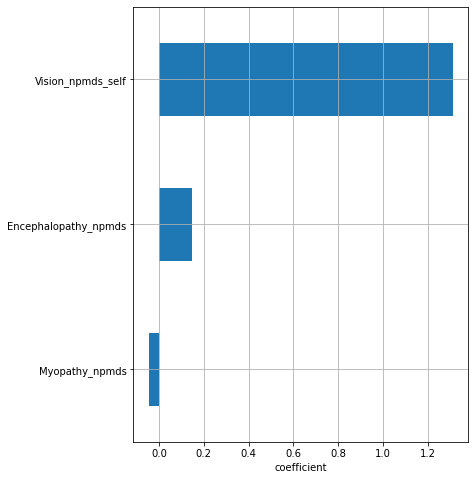

In [193]:
non_zero_coefs = coefficients.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

In [194]:
non_zero_coefs.sort_values(by='coefficient',ascending=False)

,coefficient
Vision_npmds_self,1.312061
Encephalopathy_npmds,0.148277
Myopathy_npmds,-0.045962


In [195]:
prediction = cgb.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0])

concordance index: 0.6666666666666666


In [196]:
from sksurv.metrics import integrated_brier_score

survs = cgb.predict_survival_function(X_test)
times = np.arange(3.2, 9)
preds = np.asarray([[fn(t) for t in times] for fn in survs])
score = integrated_brier_score(y_test,y_test, preds, times)

print("intergrated Brier score:",score)



intergrated Brier score: 0.3500582370984349


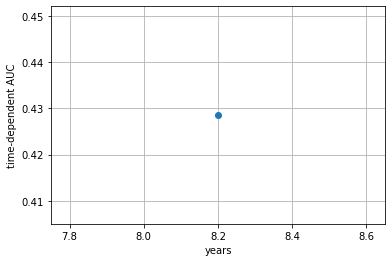

In [200]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(3.2 , 9)

cgb_auc, cgb_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, cgb_auc, marker="o")
plt.axhline(cgb_mean_auc, linestyle="--")
plt.xlabel("years")
plt.ylabel("time-dependent AUC")
plt.grid(True)

## Time to Enteral Feeding : Random Survival Forest

In [197]:
from sksurv.ensemble import RandomSurvivalForest



rsf = RandomSurvivalForest(n_estimators=50,
                           min_samples_split=6,
                           min_samples_leaf=8,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=random_state,
                           verbose=1)

rsf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


RandomSurvivalForest(max_features='sqrt', min_samples_leaf=8, n_estimators=50,
                     n_jobs=-1, random_state=42, verbose=1)

In [198]:
prediction =  rsf.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0]) 

concordance index: 0.5


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [199]:
from sksurv.metrics import integrated_brier_score

survs = rsf.predict_survival_function(X_test)
times = np.arange(3.2, 9)
preds = np.asarray([[fn(t) for t in times] for fn in survs])
score = integrated_brier_score(y_test,y_test, preds, times)

print("intergrated Brier score:",score)

intergrated Brier score: 0.22263496372310193


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


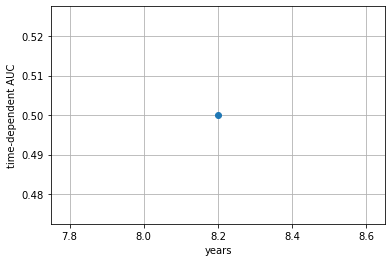

In [204]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(3.2, 9)

rsf_auc, rsf_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, rsf_auc, marker="o")
plt.axhline(rsf_mean_auc, linestyle="--")
plt.xlabel("years")
plt.ylabel("time-dependent AUC")
plt.grid(True)

In [205]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(rsf, n_iter=15, random_state=0)
perm.fit(X_test, y_test)
feature_names = X_test.columns.tolist()
eli5.show_weights(perm, feature_names=feature_names)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Paral

Weight,Feature
0 ± 0.0000,Communication_npmds
0 ± 0.0000,Extrapyramidal_npmds
0 ± 0.0000,Pyramidal_npmds
0 ± 0.0000,Myopathy_npmds
0 ± 0.0000,Ptosis_npmds
0 ± 0.0000,Vision_npmds
0 ± 0.0000,Development_npmds
0 ± 0.0000,Growth_npmds
0 ± 0.0000,Blood_npmds
0 ± 0.0000,Liver_npmds


## Time to severe mobility support

In [200]:
surv_df = npmds_combined
surv_df = surv_df[surv_df["Date"] > surv_df["Birth_date"]]
surv_df['Age'] = surv_df.apply(lambda x: x['Date']-x['Birth_date'], axis = 1)
surv_df['Age'] = surv_df['Age'].astype('timedelta64[D]').astype(int)
surv_df['Age'] = surv_df['Age']/365

surv_df['Event'] =  surv_df.apply(lambda x: 1 \
                               if x['Mobility_npmds']== 3 \
                               else 0, axis = 1)

surv_df = surv_df.sort_values(by="Date").drop_duplicates(subset=["UniqueID","Event"], keep="first")
surv_df = surv_df.sort_values(by="Date").drop_duplicates(subset=["UniqueID"], keep="last")

surv_df.drop(columns=['UniqueID','Birth_date','Date','Mobility_npmds'],inplace=True)

from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
surv_df['Sex'] = labelencoder.fit_transform(surv_df['Sex'])

In [201]:
import numpy as np
from sklearn.model_selection import train_test_split

random_state=42

df_train, df_test = train_test_split(surv_df,test_size=0.3, random_state=random_state)

X_train = df_train.drop(columns = ['Event','Age'])
y_train = df_train[['Event','Age']]
X_test = df_test.drop(columns = ['Event','Age'])
y_test = df_test[['Event','Age']]

## Time to severe Mobility Support : Kaplan Meier Estimator 

In [202]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

T = y_train["Age"]
E = y_train["Event"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 14 total observations, 5 right-censored observations>

Text(0.5, 0, 'Age (years)')

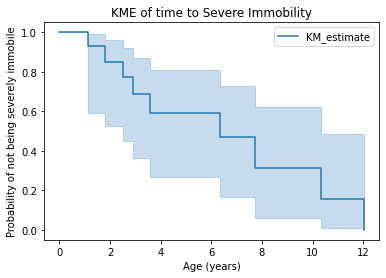

In [204]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,4))
kmf.plot_survival_function()
plt.title("KME of time to Severe Immobility");
plt.ylabel("Probability of not being severely immobile")
plt.xlabel("Age (years)")

In [205]:
kmf.median_survival_time_


6.326027397260274

In [206]:
# Formatting y dataframe into tuple array 
y_train['Event'] = y_train['Event'].replace([1],True)
y_train['Event'] = y_train['Event'].replace([0],False)
y_train = y_train.to_records(index=False)

## Time to severe Mobility Support : Cox-PH 

In [207]:
cph = CoxPHSurvivalAnalysis(alpha=0.1)
cph.fit(X_train, y_train)

CoxPHSurvivalAnalysis(alpha=0.1)

In [208]:
coef= cph.coef_
coefficients = pd.DataFrame(coef,columns=['coefficient'],index=X_train.columns)
coefficients.sort_values(by='coefficient',ascending=False)

,coefficient
Vision_npmds_self,4.678378
Cardiovascular_npmds,1.255317
Feeding_npmds,1.072416
Sex,0.765546
Vision_npmds,0.562517
Encephalopathy_npmds,0.549542
Extrapyramidal_npmds,0.269380
Myopathy_npmds,0.124306
Growth_npmds,0.054578
Development_npmds,-0.037356


In [209]:
from sksurv.metrics import concordance_index_censored

y_test['Event'] = y_test['Event'].replace([1],True)
y_test['Event'] = y_test['Event'].replace([0],False)
y_test = y_test.to_records(index=False)

prediction = cph.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print ('concordance index:', result[0])


concordance index: 0.45454545454545453


In [210]:
from sksurv.metrics import integrated_brier_score

survs = cph.predict_survival_function(X_test)
times = np.arange(3.2, 9)
preds = np.asarray([[fn(t) for t in times] for fn in survs])
score = integrated_brier_score(y_test,y_test, preds, times)

print("intergrated Brier score:",score)

intergrated Brier score: 0.35921496310275036


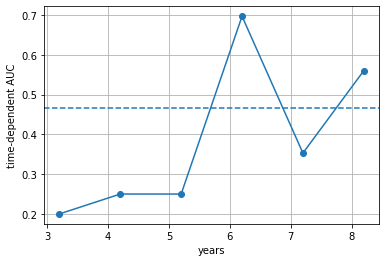

In [216]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(3.2, 9)

cph_auc, cph_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, cph_auc, marker="o")
plt.axhline(cph_mean_auc, linestyle="--")
plt.xlabel("years")
plt.ylabel("time-dependent AUC")
plt.grid(True)

## Time to severe Mobility Support : CoxNet
with Elastic Net and 5-fold crossvalidation

In [211]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

coxnet_pipe = make_pipeline(
    StandardScaler(),
    CoxnetSurvivalAnalysis()
)
warnings.simplefilter("ignore", ConvergenceWarning)
coxnet_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis', CoxnetSurvivalAnalysis())])

In [212]:
estimated_alphas = coxnet_pipe.named_steps["coxnetsurvivalanalysis"].alphas_
cv = KFold(n_splits=5, shuffle=True, random_state=random_state)
gcv = GridSearchCV(
    make_pipeline(StandardScaler(), CoxnetSurvivalAnalysis(fit_baseline_model=True)),
    param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas]},
    cv=cv,
    error_score=0.5,
    n_jobs=4).fit(X_train, y_train)

cv_results = pd.DataFrame(gcv.cv_results_)

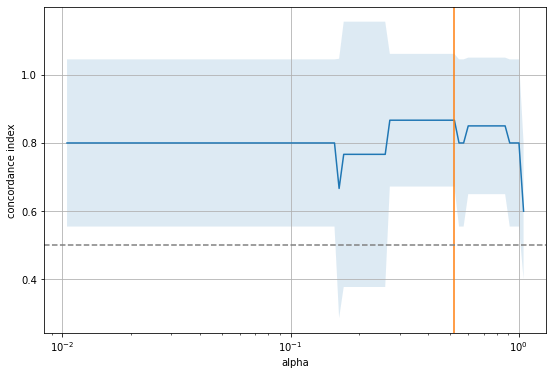

In [213]:
alphas = cv_results.param_coxnetsurvivalanalysis__alphas.map(lambda x: x[0])
mean = cv_results.mean_test_score
std = cv_results.std_test_score

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(alphas, mean)
ax.fill_between(alphas, mean - std, mean + std, alpha=.15)
ax.set_xscale("log")
ax.set_ylabel("concordance index")
ax.set_xlabel("alpha")
ax.axvline(gcv.best_params_["coxnetsurvivalanalysis__alphas"][0], c="C1")
ax.axhline(0.5, color="grey", linestyle="--")
ax.grid(True)

Number of non-zero coefficients: 1


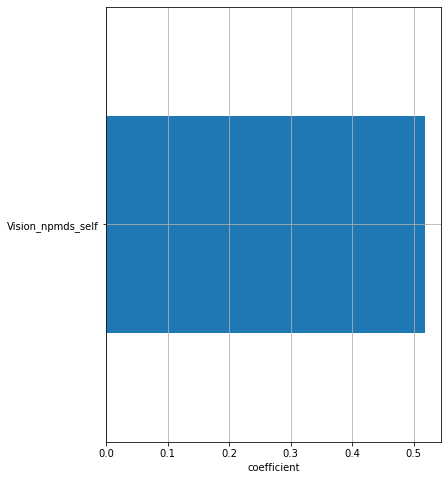

In [215]:
best_model = gcv.best_estimator_.named_steps["coxnetsurvivalanalysis"]
best_coefs = pd.DataFrame(
    best_model.coef_,
    index=X_train.columns,
    columns=["coefficient"]
)

non_zero = np.sum(best_coefs.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

non_zero_coefs = best_coefs.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

In [216]:
non_zero_coefs.sort_values(by='coefficient',ascending=False)

,coefficient
Vision_npmds_self,0.517772


In [217]:
prediction =  gcv.best_estimator_.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0]) 

concordance index: 0.45454545454545453


In [223]:
from sksurv.metrics import integrated_brier_score

survs =  gcv.best_estimator_.predict_survival_function(X_test)
times = np.arange(3.2 , 9)
preds = np.asarray([[fn(t) for t in times] for fn in survs])
score = integrated_brier_score(y_test,y_test, preds, times)

print("intergrated Brier score:",score)

intergrated Brier score: 0.21489298530947967


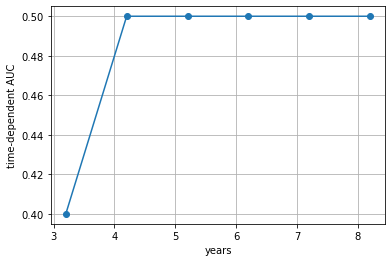

In [224]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(3.2 , 9)

gcv_auc, rgcv_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, gcv_auc, marker="o")
plt.axhline(gcv_mean_auc, linestyle="--")
plt.xlabel("years")
plt.ylabel("time-dependent AUC")
plt.grid(True)

## Time to severe Mobility Support: AFT with IPCRidge

In [218]:
from sksurv.linear_model import IPCRidge

ipc = IPCRidge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto')
ipc.fit(X_train, y_train)

IPCRidge()

In [219]:
coef= ipc.coef_
coefficients = pd.DataFrame(coef,columns=['coefficient'],index=X_train.columns)
non_zero = np.sum(coefficients.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

Number of non-zero coefficients: 22


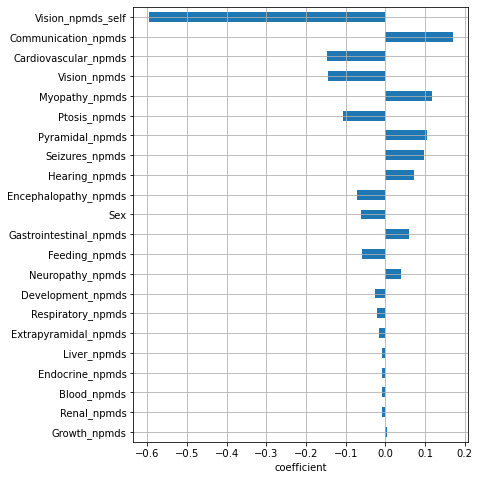

In [220]:
non_zero_coefs = coefficients.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)


In [221]:
prediction = ipc.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0])

concordance index: 0.6363636363636364


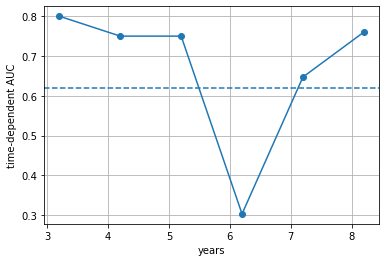

In [222]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(3.2 , 9)

ipc_auc, ipc_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, ipc_auc, marker="o")
plt.axhline(ipc_mean_auc, linestyle="--")
plt.xlabel("years")
plt.ylabel("time-dependent AUC")
plt.grid(True)

## Time to severe Mobility Support: Componentwise Gradient Boosting 

In [223]:
from sksurv.ensemble import ComponentwiseGradientBoostingSurvivalAnalysis
cgb = ComponentwiseGradientBoostingSurvivalAnalysis(loss='coxph', learning_rate=0.1, n_estimators=100, subsample=1.0, dropout_rate=0, random_state=None, verbose=0)
cgb.fit(X_train, y_train)

ComponentwiseGradientBoostingSurvivalAnalysis()

In [224]:
coef= cgb.coef_
coefficients = pd.DataFrame(coef[1:],columns=['coefficient'],index=X_train.columns)

non_zero = np.sum(coefficients.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

Number of non-zero coefficients: 3


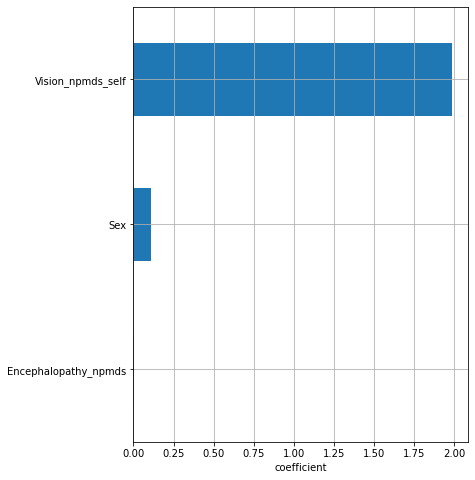

In [225]:
non_zero_coefs = coefficients.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

In [226]:
non_zero_coefs.sort_values(by='coefficient',ascending=False)

,coefficient
Vision_npmds_self,1.987628
Sex,0.106896
Encephalopathy_npmds,0.004659


In [227]:
prediction = cgb.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0])

concordance index: 0.22727272727272727


In [228]:
from sksurv.metrics import integrated_brier_score

survs = cgb.predict_survival_function(X_test)
times = np.arange(3.2 , 9)
preds = np.asarray([[fn(t) for t in times] for fn in survs])
score = integrated_brier_score(y_test,y_test, preds, times)

print("intergrated Brier score:",score)

intergrated Brier score: 0.2354090720080829


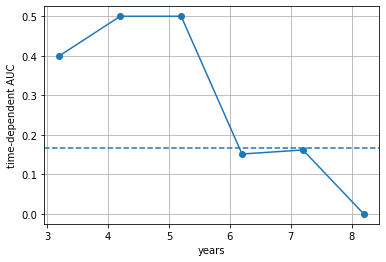

In [236]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(3.2 , 9)

cgb_auc, cgb_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, cgb_auc, marker="o")
plt.axhline(cgb_mean_auc, linestyle="--")
plt.xlabel("years")
plt.ylabel("time-dependent AUC")
plt.grid(True)

## Time to severe Mobility Support: Random Survival Forest

In [229]:
from sksurv.ensemble import RandomSurvivalForest



rsf = RandomSurvivalForest(n_estimators=50,
                           min_samples_split=6,
                           min_samples_leaf=4,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=random_state,
                           verbose=1)

rsf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


RandomSurvivalForest(max_features='sqrt', min_samples_leaf=4, n_estimators=50,
                     n_jobs=-1, random_state=42, verbose=1)

In [230]:
prediction =  rsf.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0]) 

concordance index: 0.5454545454545454


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [231]:
from sksurv.metrics import integrated_brier_score

survs = rsf.predict_survival_function(X_test)
times = np.arange(3.2 , 9)
preds = np.asarray([[fn(t) for t in times] for fn in survs])
score = integrated_brier_score(y_test,y_test, preds, times)

print("intergrated Brier score:",score)

intergrated Brier score: 0.20142618646503763


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


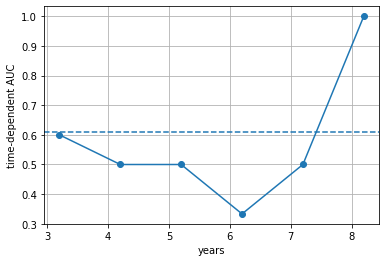

In [240]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(3.2 , 9)

rsf_auc, rsf_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, rsf_auc, marker="o")
plt.axhline(rsf_mean_auc, linestyle="--")
plt.xlabel("years")
plt.ylabel("time-dependent AUC")
plt.grid(True)

In [241]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(rsf, n_iter=15, random_state=random_state)
perm.fit(X_test, y_test)
feature_names = X_test.columns.tolist()
eli5.show_weights(perm, feature_names=feature_names)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Paral

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job

Weight,Feature
0.2303 ± 0.3033,Development_npmds
0.1576 ± 0.1236,Gastrointestinal_npmds
0.0970 ± 0.1403,Seizures_npmds
0.0970 ± 0.1688,Respiratory_npmds
0.0364 ± 0.1599,Sex
0.0121 ± 0.1305,Growth_npmds
0 ± 0.0000,Communication_npmds
0 ± 0.0000,Myopathy_npmds
0 ± 0.0000,Ptosis_npmds
0 ± 0.0000,Vision_npmds


In [242]:
df_test.shape


(6, 24)

### Weight by Age Percentiles 

In [ ]:
# subsetting the dataframe to understand changes in weight 
w = df_combined[['UniqueID','Sex','Date','Birth_date','Weight_kg']]

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# calculating the Age of patient in days for the date when the Weight was recorded 
w['Age_days'] = w['Date'] - w['Birth_date']
w.dropna(axis=0, how='any',inplace=True)
below5= w[w["Age_days"] < "1857 days"] # WHO data contains information for upto 5 years (1856 days)
below5.rename(columns={"Weight_kg":"Weight"}, inplace=True)



In [ ]:
import warnings
warnings.filterwarnings('ignore')

above5= w[w["Age_days"] > "1856 days"] 

above5.rename(columns={"Weight_kg":"Weight"}, inplace=True)

above5['Age_days']=above5['Age_days'].astype('timedelta64[M]')

above5 = above5[above5["Age_days"]<= 120] #less than 10 years

above5.rename(columns={"Age_days":"Age_months"}, inplace=True) 

In [ ]:
perc_boys_above5 = pd.read_excel("WHO_data/perc_boys_above5.xls")
perc_girls_above5 = pd.read_excel("WHO_data/perc_girls_above5.xls")

# Drop L,M,S columns 
perc_boys_above5.drop(columns = ['L','M','S'],inplace=True)
perc_girls_above5.drop(columns = ['L','M','S'],inplace=True)

# Add Sex column to each dataframe 
perc_boys_above5['Sex'] = 'M'
perc_girls_above5['Sex'] = 'F'

# Concatenate the boys and girls dataset
perc_above5 =  pd.concat([perc_boys_above5,perc_girls_above5],ignore_index=True)
perc_above5.rename(columns={"Month":"Age_months"}, inplace=True) # rename Age column

In [ ]:
# Dataframe for children below 5 years with information on Age and percentiles
above5 = pd.merge(above5, perc_above5, on=["Age_months","Sex"],how='left')
above5.dropna(axis=0,inplace=True)

In [ ]:
from scipy.interpolate import interp1d

# formula to interpolate from the percentile rows 
# given the weight of patient to estimate the percentile they are in 
def w_perc (row):
    xg = np.array([row.P01,row.P1,row.P3,row.P5,row.P10,row.P15,
                   row.P25,row.P50,row.P75,row.P85,row.P90,row.P95,row.P97,row.P99,row.P999])
    yg = np.array([0.01,1,3,5,10,15,25,50,75,85,90,95,97,99,99.9])
    f_interp = interp1d(xg,yg,fill_value="extrapolate")
    xw = row.Weight
    
    return(f_interp(xw))

In [ ]:
# adding percentiles column 
above5['wba_percentiles'] = above5.apply(lambda row: w_perc(row),axis=1)
above5.drop(columns = ['P01','P1','P3','P5','P10','P15','P25','P50',
                       'P75','P85','P90','P95','P97','P99','P999'],inplace=True)

In [ ]:
# Load dataframes obtained from WHO 
# perc_boys = pd.read_csv(os.path.join(path,"perc_boys.txt"),delimiter='\s+')
# perc_girls = pd.read_csv(os.path.join(path,"perc_girls.txt"),delimiter='\s+')

perc_boys = pd.read_csv("WHO_data/perc_boys.txt",delimiter='\s+')
perc_girls = pd.read_csv("WHO_data/perc_girls.txt",delimiter='\s+')

# Drop L,M,S columns 
perc_boys.drop(columns = ['L','M','S'],inplace=True)
perc_girls.drop(columns = ['L','M','S'],inplace=True)

# Add Sex column to each dataframe 
perc_boys['Sex'] = 'M'
perc_girls['Sex'] = 'F'

# Concatenate the boys and girls dataset
perc_below5 =  pd.concat([perc_boys,perc_girls],ignore_index=True)
perc_below5.rename(columns={"Age":"Age_days"}, inplace=True) # rename Age column
perc_below5['Age_days'] = pd.to_timedelta(perc_below5['Age_days'], unit='D') #converting to timedelta format



In [ ]:
above5.dropna(inplace=True)

In [ ]:
above5.unique()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

above5['Age_months'] = above5['Age_months'].astype('timedelta64[M]').astype(int)

plt.figure(figsize=(8,6))
sns.scatterplot(data=above5, x='Age_months', y='wba_percentiles', hue='Sex')
plt.xlabel("Age (months)")
plt.ylabel("Weight by age percentiles")

In [ ]:
# Dataframe for children below 5 years with information on Age and percentiles
below5 = pd.merge(below5, perc_below5, on=["Age_days","Sex"],how='left')


In [ ]:
below5.dropna(axis=0,inplace=True)

In [ ]:
from scipy.interpolate import interp1d

# formula to interpolate from the percentile rows 
# given the weight of patient to estimate the percentile they are in 
def w_perc (row):
    xg = np.array([row.P01,row.P1,row.P3,row.P5,row.P10,row.P15,
                   row.P25,row.P50,row.P75,row.P85,row.P90,row.P95,row.P97,row.P99,row.P999])
    yg = np.array([0.01,1,3,5,10,15,25,50,75,85,90,95,97,99,99.9])
    f_interp = interp1d(xg,yg,fill_value="extrapolate")
    xw = row.Weight
    
    return(f_interp(xw))


In [ ]:
# adding percentiles column 
below5['wba_percentiles'] = below5.apply(lambda row: w_perc(row),axis=1)
below5.drop(columns = ['P01','P1','P3','P5','P10','P15','P25','P50',
                       'P75','P85','P90','P95','P97','P99','P999'],inplace=True)


In [ ]:
below5['wba_percentiles'] = below5['wba_percentiles'].astype(int)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

below5['Age_years'] = below5['Age_days'].astype('timedelta64[Y]').astype(int)

plt.figure(figsize=(8,6))
sns.scatterplot(data=below5, x='Age_years', y='wba_percentiles', hue='Sex')
plt.xlabel("Age (years)")
plt.ylabel("Weight by age percentiles")

In [ ]:
import numpy as np

plt.figure(figsize=(8,6))
sns.scatterplot(data=below5, x='Age_years', y='wba_percentiles', hue='UniqueID')
plt.legend(title='Patient ID',bbox_to_anchor=(1.25, 1), loc='upper right', borderaxespad=0)
plt.xlabel("Age (years)")
plt.ylabel("Weight by age percentiles")

In [ ]:
below5['Age_days'] = below5['Age_days'].astype('timedelta64[D]').astype(int)

plt.figure(figsize=(8,6))
sns.scatterplot(data=below5, x='Age_days', y='wba_percentiles', hue='Sex')
plt.xlabel("Age (days)")
plt.ylabel("Weight by age percentiles")

In [ ]:
import numpy as np

plt.figure(figsize=(8,6))
sns.scatterplot(data=below5, x='Age_days', y='wba_percentiles', hue='UniqueID')
plt.legend(title='Patient ID',bbox_to_anchor=(1.25, 1), loc='upper right', borderaxespad=0)
plt.xlabel("Age (days)")
plt.ylabel("Weight by age percentiles")

In [ ]:
import numpy as np

plt.figure(figsize=(8,6))
sns.lineplot(data=below5, x='Age_days', y='wba_percentiles', hue='UniqueID')
plt.legend(title='Patient ID',bbox_to_anchor=(1.25, 1), loc='upper right', borderaxespad=0)
plt.xlabel("Age (days)")
plt.ylabel("Weight by age percentiles")

In [ ]:
nmdas.shape

In [ ]:
nmdas